In [1054]:
# Data update functionality
import os
from pathlib import Path
from fabric import ThreadingGroup,Connection
from fabric.transfer import Transfer

# global configuration parameters
experiment_type = "random"
exploration_name = "Exploration_5"

hosts = {}
with open(str(Path("~/.ssh/config").expanduser()),'r') as f:
    for line in f.readlines():
        if "HostName" in line:
            cleaned_ip = line.strip(" ").split(" ")[2].strip('\n')
            if cleaned_ip != r'None':
                ip = cleaned_ip
            else:
                host = None
                ip = None
        if "Host" in line and "HostName" not in line:
            cleaned_host = line.split(" ")[1].strip("\n")
            if "a" not in cleaned_host:
                host = cleaned_host
            else:
                host = None
                ip = None
        if host is not None and ip is not None:
            hosts[host]= ip

key_file_loc = "/Users/sfeygi/.ssh/beam_competitions_key.pem"
dest_root = "/Users/sfeygi/current_code/others/prize_starter_kit/search-output/{}/{}/".format(exploration_name,experiment_type)

def connect_parallel(hosts,key_file_loc):
    return ThreadingGroup(*hosts,user='ubuntu',connect_kwargs={"key_filename":[key_file_loc]})

def connect_single(host, key_file_loc):
    return Connection(host,user='ubuntu',connect_kwargs={"key_filename":[key_file_loc]})

def run(cmd, connection):
    return connection.run(cmd)

def run_n(cmd, connections):
    return [run(cmd,connection) for connection in connections]

def rsync_results(hostname, host_ip, key_file_loc, dest_root,exploration_name,experiment_type):
    experiment_type = 'random_inputs' if experiment_type == 'random' else experiment_type
    return os.system(
        'rsync -avz -e "ssh -i {key_file_loc}" ubuntu@{host_ip}:/home/ubuntu//Uber-Prize-Starter-Kit/search-output-{exploration_name}-{experiment_type}/ {dest_root}{hostname} --exclude="*/ITERS/" --exclude="*/output*" --exclude="*/competition/viz/" --exclude="*/summaryStats/"'.format(
            exploration_name=exploration_name,experiment_type=experiment_type,dest_root=dest_root,key_file_loc=key_file_loc, hostname=hostname, host_ip=host_ip))

# global other
host_names = ["host{}".format(str(i + 1)) for i in range(len(hosts))]
connection = connect_parallel(hosts,key_file_loc)

In [1055]:
# try:
#     run('cd /home/ubuntu/Uber-Prize-Starter-Kit/utilities &&  \
#         git pull origin vgv/#55-adapt_ramdom_search', connection)
# except UnexpectedExit:
#     print("Already pulled in latest!")
# Ensure that docker image on server is latest (somewhat orthogonal to this notebook, but leaving here for now)
run('docker pull beammodel/beam-competition:0.0.1-SNAPSHOT',connection)


0.0.1-SNAPSHOT: Pulling from beammodel/beam-competition
54f7e8ac135a: Already exists
d6341e30912f: Already exists
087a57faf949: Already exists
5d71636fb824: Already exists
0c1db9598990: Already exists
2eeb5ce9b924: Already exists
5b17b6f4d4e0: Already exists
f1abee0af377: Already exists
0.0.1-SNAPSHOT: Pulling from beammodel/beam-competition
54f7e8ac135a: Already exists
298587aefca5: Already exists
0.0.1-SNAPSHOT: Pulling from beammodel/beam-competition
0.0.1-SNAPSHOT: Pulling from beammodel/beam-competition
54f7e8ac135a: Already exists
54f7e8ac135a: Already exists
d6341e30912f: Already exists
d6341e30912f: Already exists
087a57faf949: Already exists
5d71636fb824: Already exists
d6341e30912f: Already exists
0c1db9598990: Already exists
2eeb5ce9b924: Already exists
5b17b6f4d4e0: Already exists
f1abee0af377: Already exists
087a57faf949: Already exists
5d71636fb824: Already exists
0c1db9598990: Already exists
087a57faf949: Already exists
5d71636fb824: Already exists
0c1db9598990: Already 

write /var/lib/docker/tmp/GetImageBlob167009678: no space left on device


596888c92da4: Verifying Checksum
596888c92da4: Download complete
596888c92da4: Download complete
0c1db9598990: Already exists
2eeb5ce9b924: Already exists
5b17b6f4d4e0: Already exists
f1abee0af377: Already exists
298587aefca5: Already exists
d19a52a4201b: Already exists
c4b97e37313f: Already exists
0da75cc02c04: Already exists
01556cb5c24d: Already exists
59cec1e23469: Already exists
a4e8cfda4e7e: Already exists
c2c7d8e9c50f: Already exists
26431a57825a: Already exists
916606cef963: Already exists
77e7c1d02cf0: Already exists
fbaced5f3ab6: Already exists
da3c75a71849: Already exists
2c15ce938ad2: Already exists
4cef7fc3dfe3: Already exists
a0dd5a72f852: Already exists
25f9d1f0e84f: Already exists
91f75cadeb60: Pulling fs layer
596888c92da4: Pulling fs layer
c227ca2a7fce: Pulling fs layer
bc8fb5dc332c: Pulling fs layer
9ca33c9a1eac: Pulling fs layer
7fd672845809: Pulling fs layer
0a2abd486fba: Pulling fs layer
9ca33c9a1eac: Waiting
0a2abd486fba: Waiting
bc8fb5dc332c: Waiting
298587aefca

91f75cadeb60: Verifying Checksum
91f75cadeb60: Download complete
91f75cadeb60: Pull complete
596888c92da4: Pull complete
91f75cadeb60: Pull complete
7fd672845809: Verifying Checksum
7fd672845809: Download complete
91f75cadeb60: Pull complete
7fd672845809: Verifying Checksum
7fd672845809: Download complete
596888c92da4: Pull complete
91f75cadeb60: Pull complete
596888c92da4: Pull complete
91f75cadeb60: Pull complete
596888c92da4: Pull complete
596888c92da4: Pull complete
91f75cadeb60: Pull complete
596888c92da4: Pull complete
596888c92da4: Pull complete
c227ca2a7fce: Pull complete
c227ca2a7fce: Pull complete
c227ca2a7fce: Pull complete
c227ca2a7fce: Pull complete
91f75cadeb60: Pull complete
c227ca2a7fce: Pull complete
c227ca2a7fce: Pull complete
c227ca2a7fce: Pull complete
bc8fb5dc332c: Pull complete
bc8fb5dc332c: Pull complete
bc8fb5dc332c: Pull complete
bc8fb5dc332c: Pull complete
596888c92da4: Pull complete
bc8fb5dc332c: Pull complete
bc8fb5dc332c: Pull complete
bc8fb5dc332c: Pull co

GroupException: {<Connection host=52.13.145.44 user=ubuntu>: <Result cmd='docker pull beammodel/beam-competition:0.0.1-SNAPSHOT' exited=0>, <Connection host=54.202.221.118 user=ubuntu>: <Result cmd='docker pull beammodel/beam-competition:0.0.1-SNAPSHOT' exited=0>, <Connection host=52.38.92.77 user=ubuntu>: <Result cmd='docker pull beammodel/beam-competition:0.0.1-SNAPSHOT' exited=0>, <Connection host=34.210.88.9 user=ubuntu>: <Result cmd='docker pull beammodel/beam-competition:0.0.1-SNAPSHOT' exited=0>, <Connection host=54.184.118.222 user=ubuntu>: <Result cmd='docker pull beammodel/beam-competition:0.0.1-SNAPSHOT' exited=0>, <Connection host=34.210.22.65 user=ubuntu>: <Result cmd='docker pull beammodel/beam-competition:0.0.1-SNAPSHOT' exited=0>, <Connection host=54.191.161.231 user=ubuntu>: <Result cmd='docker pull beammodel/beam-competition:0.0.1-SNAPSHOT' exited=0>, <Connection host=52.89.179.9 user=ubuntu>: <Result cmd='docker pull beammodel/beam-competition:0.0.1-SNAPSHOT' exited=0>, <Connection host=34.217.44.162 user=ubuntu>: <Result cmd='docker pull beammodel/beam-competition:0.0.1-SNAPSHOT' exited=0>, <Connection host=54.218.29.151 user=ubuntu>: <Result cmd='docker pull beammodel/beam-competition:0.0.1-SNAPSHOT' exited=0>, <Connection host=54.218.172.167 user=ubuntu>: <UnexpectedExit: cmd='docker pull beammodel/beam-competition:0.0.1-SNAPSHOT' exited=1>}

In [1007]:
# Pull latest results from servers
[rsync_results(hostname, host_ip, key_file_loc,dest_root,exploration_name,experiment_type) for hostname, host_ip in hosts.items()]


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [1008]:
import pandas as pd
import seaborn as sns
# import dask.dataframe as dd
import numpy as np
from collections import defaultdict
import re
from pathlib import Path
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [1009]:
# Set plotting config
sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.set_context('notebook')

%matplotlib inline

In [1010]:
# Parsing utilities
def split_range(range_repr):
    """
    Split's out a mathematical range representation into its component bounds.
    
    Exclusive ('(',')') bounds will have the left and/or right bounds properly
    augmented with +1 and -1, respectively. Inclusive bounds ('[',']') will remain
    as written.
    
    Parameters
    ----------
    range_repr : str
        A formatted representation of the range with exclusive and inclusive
        bounds represented as '(',')' and/or '[',']', respectively, for example,
        the range "(300:500]" represents all numbers between 300 (exclusive) and 500
        (inclusive).
    
    Returns
    -------
    str
        The input range representation as pair of integers with the ':' remaining to permit
        easy splitting with the series `str.split` function when the `expand` argument is `True`.
    
    Examples
    --------
    >>> split_range("(47000:202000]")
    '47001:202000'
    >>> split_range("(47000:202000]")
    '155000:176000'
    
    """
    if isinstance(range_repr,float):
        return "0:120"
    l,r = range_repr.strip("(),[]").split(":")
    l = int(l) + 1 if range_repr[0] is '(' else int(l) + 0
    r = int(r) - 1 if range_repr[-1] is ')' else int(r) + 0
    return "{}:{}".format(l,r)

# input_db = pd.concat(all_input_dfs).set_index("output_key")
def concat_and_set_index(df,name):
    return pd.concat(df[name]).set_index("output_key")
def expand_range_column(in_df,field):
    in_series = in_df.loc[:,field]
    in_df = in_series.apply(split_range).str.split(":",expand=True)
    in_df.columns = ["{}_low".format(field),"{}_high".format(field)]
#     in_df
    return in_df

def split_input_range(input_df,input_fields):
    tmp_res = []
    for input_field in input_fields:
        split_input_field=expand_range_column(input_df,input_field)
        input_df.drop(input_field,axis=1,inplace=True)
        tmp_res.append(split_input_field)
    input_type_df = pd.concat(tmp_res,axis=1)
    return pd.concat([input_df,input_type_df],axis=1)

def merge_input_type_df_with_score(input_df,scores_df,score_type):
    sub_scores = scores_df.loc[score_type]
    score_df = pd.merge(sub_scores,input_df,how="outer",right_index=True,left_on="output_key").set_index("output_key")
    return score_df.dropna(axis=0)

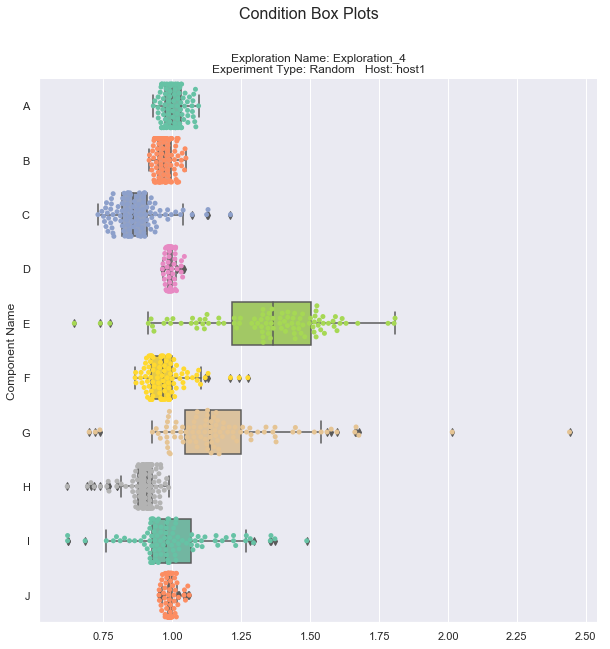

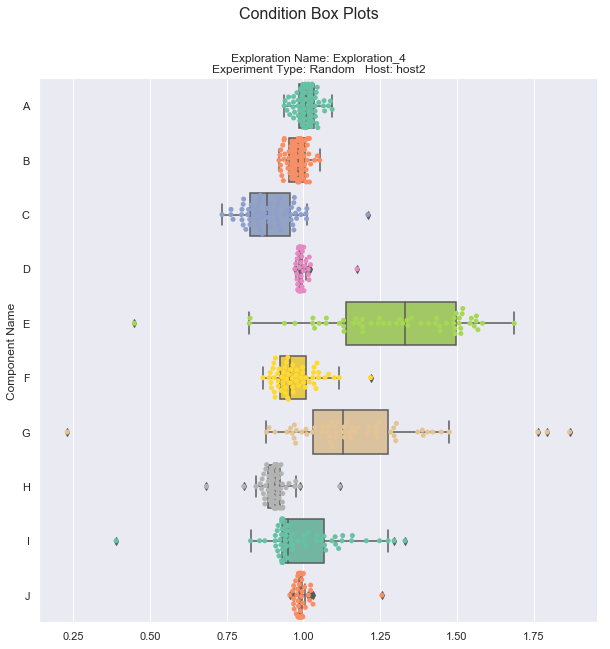

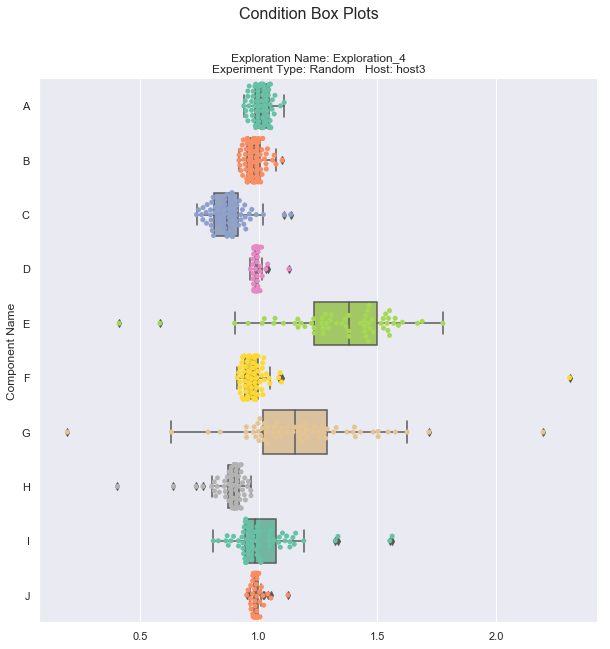

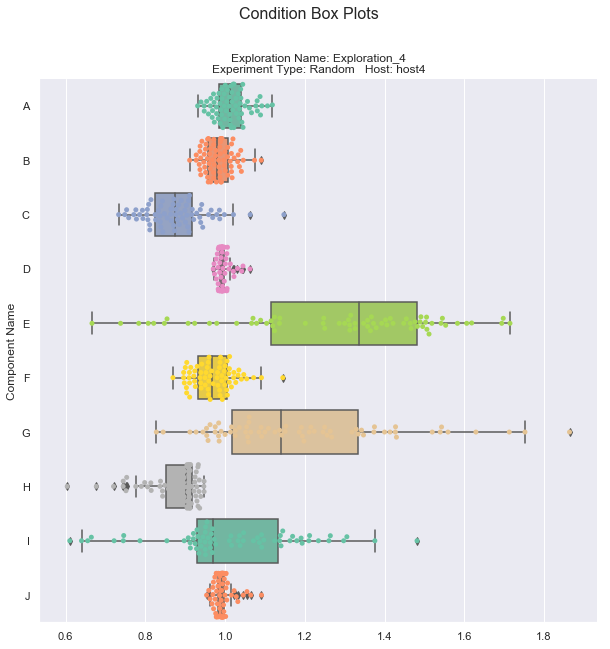

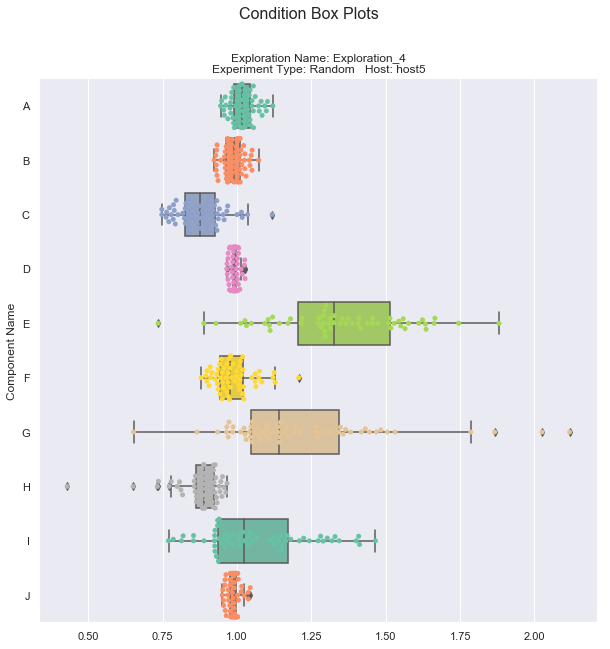

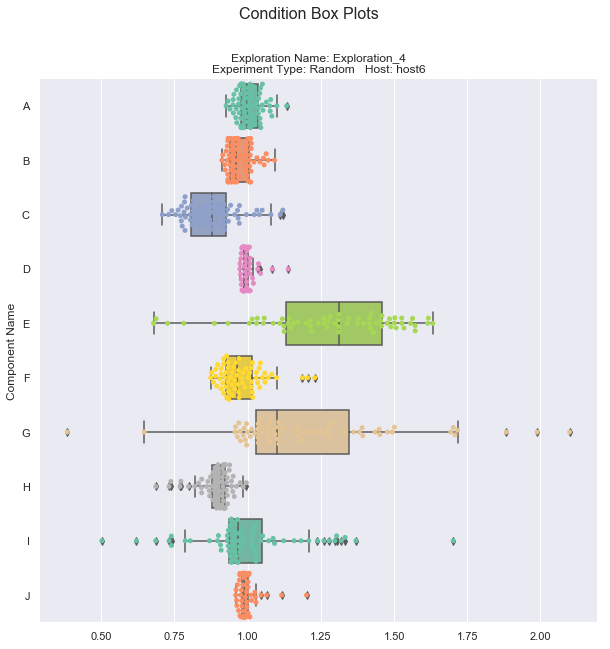

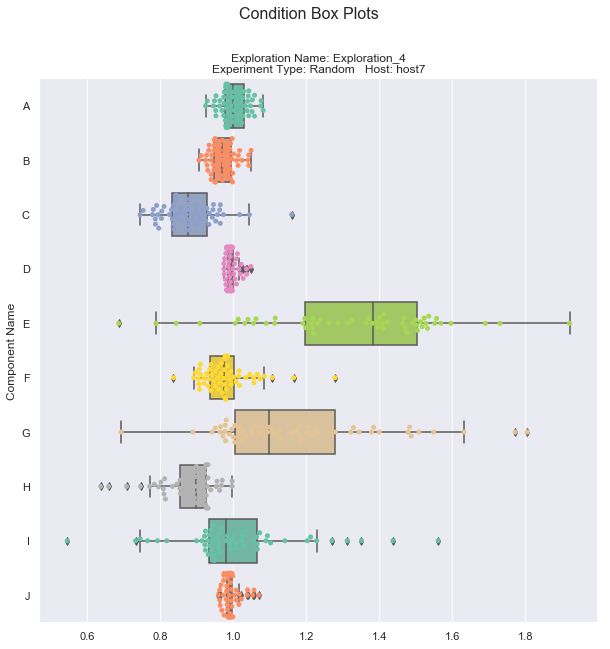

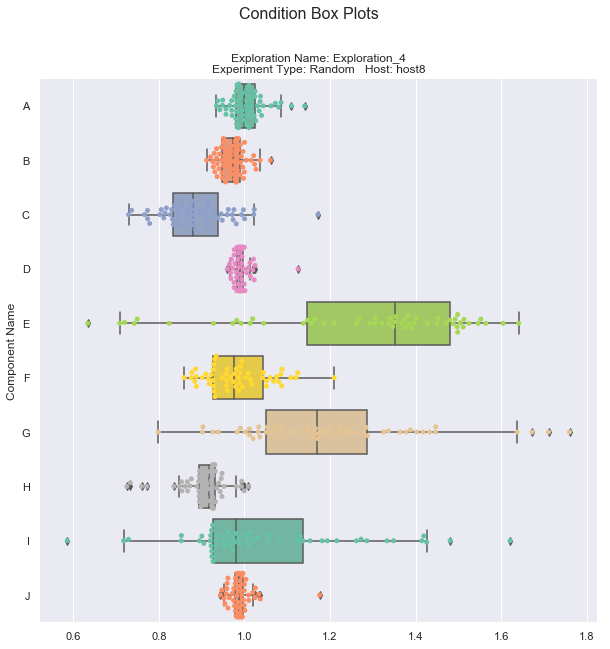

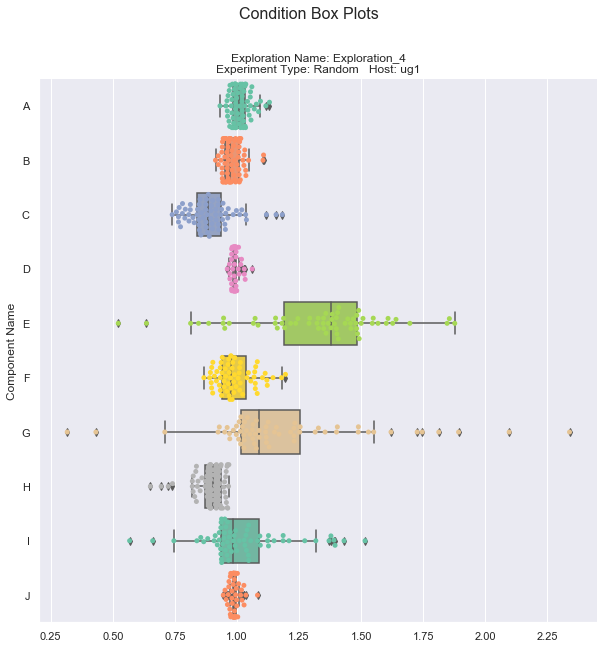

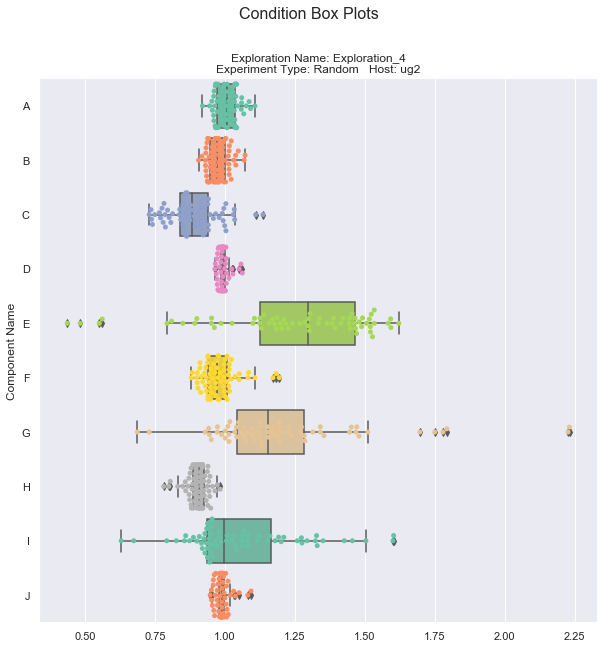

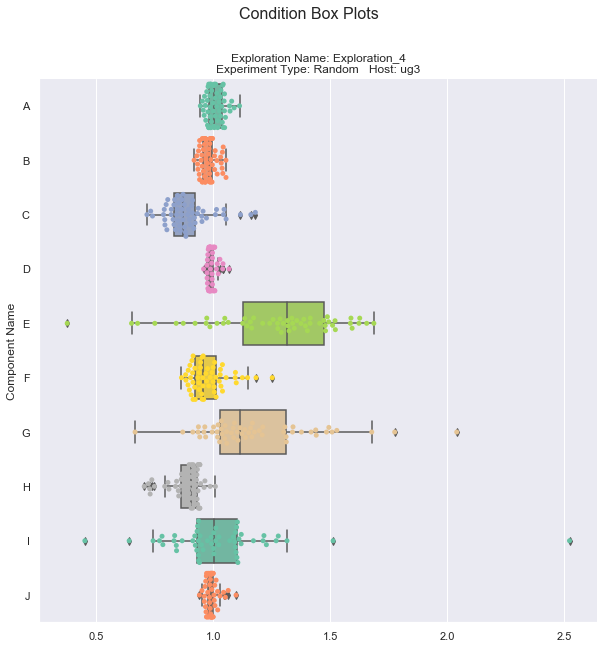

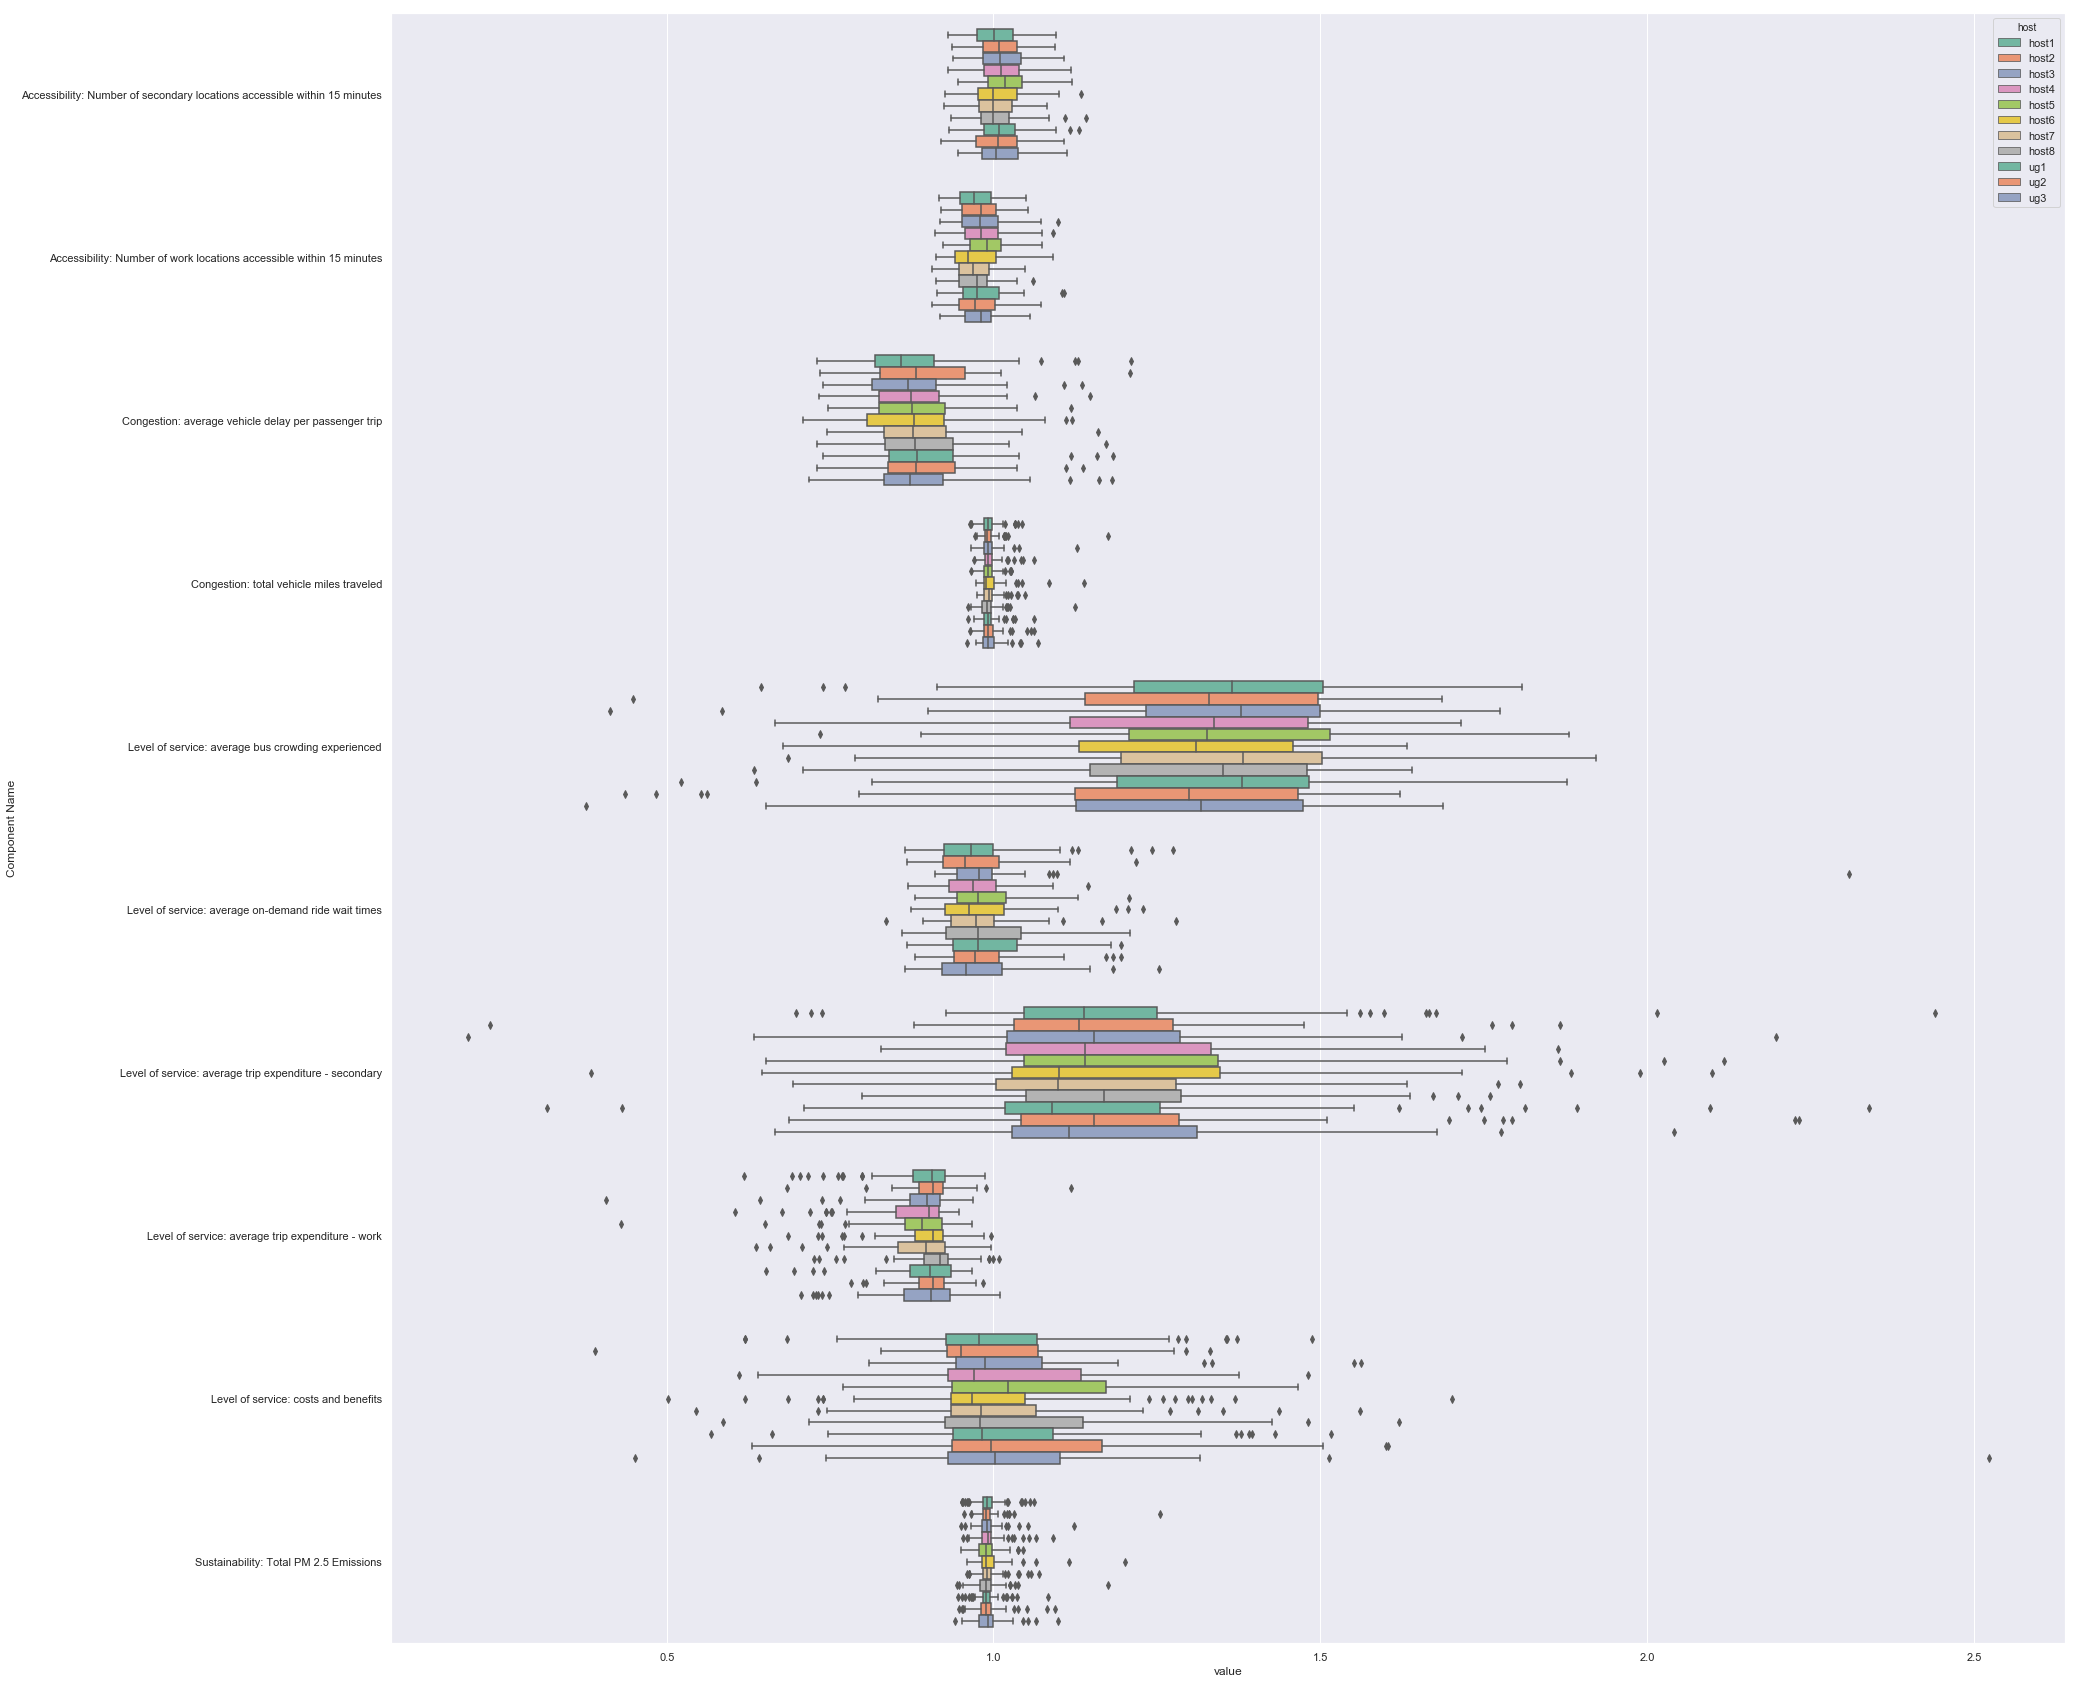

In [1065]:
# collect, parse, and concatenate scores as well as plot by condition
import glob
BAU_STATS = "/Users/sfeygi/current_code/scala/projects/BeamCompetitions/fixed-data/sioux_faux/bau/stats/summaryStats-15k.csv"

bau_summary_stats_df = pd.read_csv(BAU_STATS)

experiment_types = ['random']
exploration_name = 'Exploration_4'
wide_score_dfs = []
for experiment_type in experiment_types:
    i = 0
    scores_dfs={}
    for host in sorted(hosts.keys()):
    

            common="../search-output/{}/{}/{}/".format(exploration_name,experiment_type,host)
            output_dirs = glob.glob(common+"output*/sioux_faux/sioux_faux-15k*/competition/")
            
            sub_score_dfs = []
            all_input_dfs = defaultdict(list)
            SUBMISSION_INPUTS_DIR_NAME = "submission-inputs/"
            SUB_SCORE_NAME = "submissionScores.csv"
            SUMMARY_STATS_NAME = "../summaryStats.csv"
            input_names = ("FrequencyAdjustment","ModeIncentives","MassTransitFares","VehicleFleetMix")
            try:
                for output_dir in output_dirs:
                    # Load sub_score_dfs
                    sub_score_file = output_dir + SUB_SCORE_NAME
                    if not Path(sub_score_file).is_file():
                        continue
                    score_df = pd.read_csv(sub_score_file,index_col="Component Name")
                    output_key = re.findall("^.*output[_|-](.*?)(?:/sioux.*)$",output_dir)[0]
                    if "RS" not in output_key:  # filter out old runs for now
                        continue
                         
                    summary_stats_path = output_dir + SUMMARY_STATS_NAME
                    if Path(summary_stats_path).is_file():
                        sub_summary_stats_df = pd.read_csv(summary_stats_path)
#                     sub_vmt=sub_summary_stats_df.iloc[-1].loc['motorizedVehicleMilesTraveled_BUS-DEFAULT':'motorizedVehicleMilesTraveled_CAR-TYPE-DEFAULT'].sum()
#                     bau_vmt=bau_summary_stats_df.iloc[-1].loc['motorizedVehicleMilesTraveled_BUS-DEFAULT':'motorizedVehicleMilesTraveled_CAR-TYPE-DEFAULT'].sum()
#                     sub_vmt_score = sub_vmt/bau_vmt
#                      
#                     score_df.loc["Congestion: total vehicle miles traveled",'Raw Score'] = sub_vmt_score
                    
                    score_df.loc[:,"output_key"] = output_key
                    sub_score_dfs.append(score_df[["Raw Score","output_key"]])
                    
                    for input_name in input_names:
                        input_file = output_dir + SUBMISSION_INPUTS_DIR_NAME +"/"+ input_name+".csv"
                        if input_name == 'ModeIncentives':
                            input_df = pd.read_csv(input_file,dtype={'age':str})
                        else:
                            input_df = pd.read_csv(input_file)
                        if input_df.shape[0] == 0:
                            continue
                        input_df.loc[:,"output_key"] = output_key
                        input_df.index.name = 'obs_num'
                        all_input_dfs[input_name].append(input_df)
            except ValueError|KeyError as e:
                print(e)
                print(host)
            freq_df = concat_and_set_index(all_input_dfs,"FrequencyAdjustment").drop('exact_times',axis=1)
            mode_df = concat_and_set_index(all_input_dfs,"ModeIncentives")
            ptfare_df = concat_and_set_index(all_input_dfs,"MassTransitFares")
            vfm_df = concat_and_set_index(all_input_dfs,"VehicleFleetMix").drop("agencyId",axis=1)

            trip_id_factors = pd.factorize(freq_df.loc[:,"route_id"])
            freq_df.loc[:,"route_id"]=trip_id_factors[0]

            mode_factors = pd.factorize(mode_df.loc[:,"mode"])
            mode_df.loc[:,"mode"]=mode_factors[0]
            scores_df = pd.concat(sub_score_dfs)

            score_type = "Submission Score"
            try:
                a,b = pd.factorize(list(set(ptfare_df.loc[:, "routeId"].values).union(set(ptfare_df.loc[:,"routeId"]))))
                mapping = dict(zip(b,a))
                ptfare_df.loc[:,"routeId"]=ptfare_df.loc[:,"routeId"].apply(lambda x: mapping[x])
                vfm_df.loc[:, "routeId"] = vfm_df.loc[:, "routeId"].apply(lambda x: mapping[x])

                vehicle_type_factors = pd.factorize(vfm_df.loc[:,"vehicleTypeId"])
                vfm_df.loc[:,"vehicleTypeId"] = vehicle_type_factors[0]

                input_type = "ModeIncentives"
                input_fields = ["income","age"]
                mode_df = split_input_range(mode_df.copy(),input_fields)

                input_type = "MassTransitFares"
                input_fields = ["age"]
                ptfare_df = split_input_range(ptfare_df.copy(),input_fields)

  
                freq_subscore_df = merge_input_type_df_with_score(freq_df,scores_df,score_type)
                mode_subscore_df = merge_input_type_df_with_score(mode_df,scores_df,score_type)
                ptfare_subscore_df = merge_input_type_df_with_score(ptfare_df,scores_df,score_type)
                vfm_subscore_df = merge_input_type_df_with_score(vfm_df,scores_df,score_type)
            except KeyError as e:
                print(e)
                print(host)
            except ValueError as e:
                print(e)
                print(host)

            freq_subscore_df=freq_subscore_df[freq_subscore_df["Raw Score"]>0]
            scores_df_wide = scores_df.reset_index().pivot(index='output_key',columns='Component Name',values='Raw Score')
            scores_dfs[host] = scores_df_wide
            fig = plt.figure(figsize=(10,10))
            
            # For plotting:
            
            sns.boxplot(data=scores_df_wide.drop("Submission Score",axis=1),orient='h',palette='Set2')
            sns.swarmplot(data=scores_df_wide.drop("Submission Score",axis=1),orient='h',palette='Set2',color=".25")
            axis = fig.axes[0]
        #     axis.set_xlim(-0.25,5.0)
            plt.suptitle('Condition Box Plots',fontsize=16)
            plt.title("Exploration Name: {}\nExperiment Type: {}   Host: {}".format(exploration_name, experiment_type.title(),host))
            axis.set_yticklabels(['A','B','C','D','E','F','G','H','I','J'])
            sns.despine()
            plt.show()

            fig.savefig("img/{}/{}/{}.png".format(exploration_name,experiment_type, host),format="png",dpi=150)
            plt.close()

    for k,df in scores_dfs.items():
        df['host'] = k
    wide_scores = pd.concat(list(scores_dfs.values()),axis=0)
    wide_scores = wide_scores.drop(['Submission Score','host'],axis=1).astype('float')
    wide_scores.to_csv('img/{}/wide-scores_{}_{}.csv'.format(exploration_name,experiment_type,exploration_name,experiment_type))

    # Plot the full distribution across worker nodes
    grouped = pd.concat(list(scores_dfs.values()))
    melted=pd.melt(grouped.drop("Submission Score",axis=1),id_vars='host')
    fig = plt.figure(figsize=(30,30))

    sns.boxplot(y='Component Name',x='value',hue='host',data=melted,orient='h',palette='Set2')
    fig.savefig('img/{}/{}/grouped.png'.format(exploration_name,experiment_type),dpi=300)
    
    wide_score_dfs.append(wide_scores)


In [1066]:
wide_scores = pd.concat(wide_score_dfs,axis=0)
wide_scores.iloc[:,:2]=np.reciprocal(wide_scores.iloc[:,:2])
wide_scores['Level of service: costs and benefits'] = np.reciprocal(wide_scores['Level of service: costs and benefits'])

In [1067]:
wide_scores.describe()

Component Name,Accessibility: Number of secondary locations accessible within 15 minutes,Accessibility: Number of work locations accessible within 15 minutes,Congestion: average vehicle delay per passenger trip,Congestion: total vehicle miles traveled,Level of service: average bus crowding experienced,Level of service: average on-demand ride wait times,Level of service: average trip expenditure - secondary,Level of service: average trip expenditure - work,Level of service: costs and benefits,Sustainability: Total PM 2.5 Emissions
count,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000
mean,0.992517,1.023741,0.881781,0.994201,1.302310,0.981373,1.186542,0.889873,1.007101,0.992275
std,0.038044,0.036960,0.084534,0.018910,0.249241,0.083898,0.257308,0.065661,0.182945,0.025985
min,0.876535,0.903020,0.708479,0.959191,0.376275,0.836066,0.195402,0.406667,0.396247,0.941446
25%,0.965426,0.998419,0.824511,0.985423,1.155036,0.931832,1.027870,0.874242,0.912090,0.981410
50%,0.993485,1.025009,0.875832,0.991344,1.347302,0.970766,1.128191,0.904339,1.021313,0.989438
75%,1.020746,1.051812,0.927802,0.997822,1.488205,1.011260,1.292608,0.926219,1.073125,0.996874
max,1.086614,1.104022,1.210922,1.174460,1.921575,2.308211,2.441146,1.117890,2.566811,1.255284


In [1068]:
wide_scores = wide_scores.drop("Level of service: average on-demand ride wait times",axis=1)

In [1073]:
import pandas as pd, numpy as np
# wide_scores = pd.read_csv("img/random/wide-scores_random.csv")
wide_score_summary=wide_scores.agg(['mean','std']).round(3)
# wide_score_summary = wide_score_summary.T
wide_score_summary

,Accessibility: Number of secondary locations accessible within 15 minutes,Accessibility: Number of work locations accessible within 15 minutes,Congestion: average vehicle delay per passenger trip,Congestion: total vehicle miles traveled,Level of service: average bus crowding experienced,Level of service: average trip expenditure - secondary,Level of service: average trip expenditure - work,Level of service: costs and benefits,Sustainability: Total PM 2.5 Emissions
mean,0.993,1.024,0.882,0.994,1.302,1.187,0.890,1.007,0.992
std,0.038,0.037,0.085,0.019,0.249,0.257,0.066,0.183,0.026


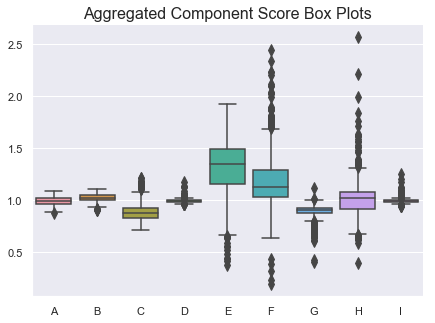

In [1074]:
sns.set_context('notebook')
sns.set_palette('Set2')

fig, ax = plt.subplots()
fig.set_size_inches(7,5)
columns = ['A','B','C','D','E','F','G','H','I']
ser = []
for i in range(wide_scores.shape[1]):
    ser.append(wide_scores.T.iloc[i].values)
sns.boxplot(y=ser,x=columns,orient='v',fliersize=8)
plt.title('Aggregated Component Score Box Plots',fontsize=16)
# plt.title("Random Search over Input Space")
sns.despine()


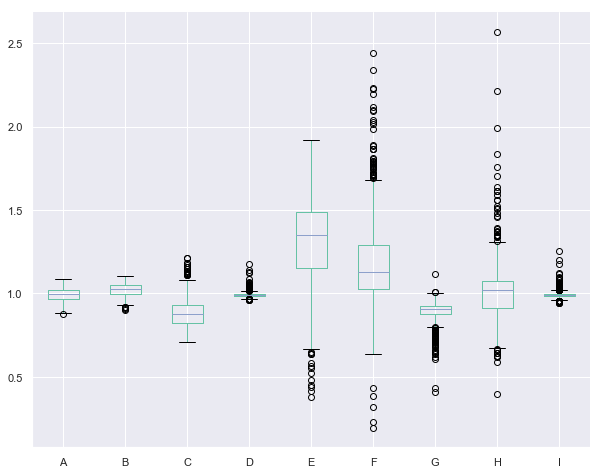

In [1075]:
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
sns.set_palette('Set2')
sns.despine()
pd.DataFrame(dict(zip(columns,ser))).plot(kind='box',ax=ax)
fig.savefig('img/{}/{}/aggregate_box.png'.format(exploration_name,experiment_type),dpi=300)

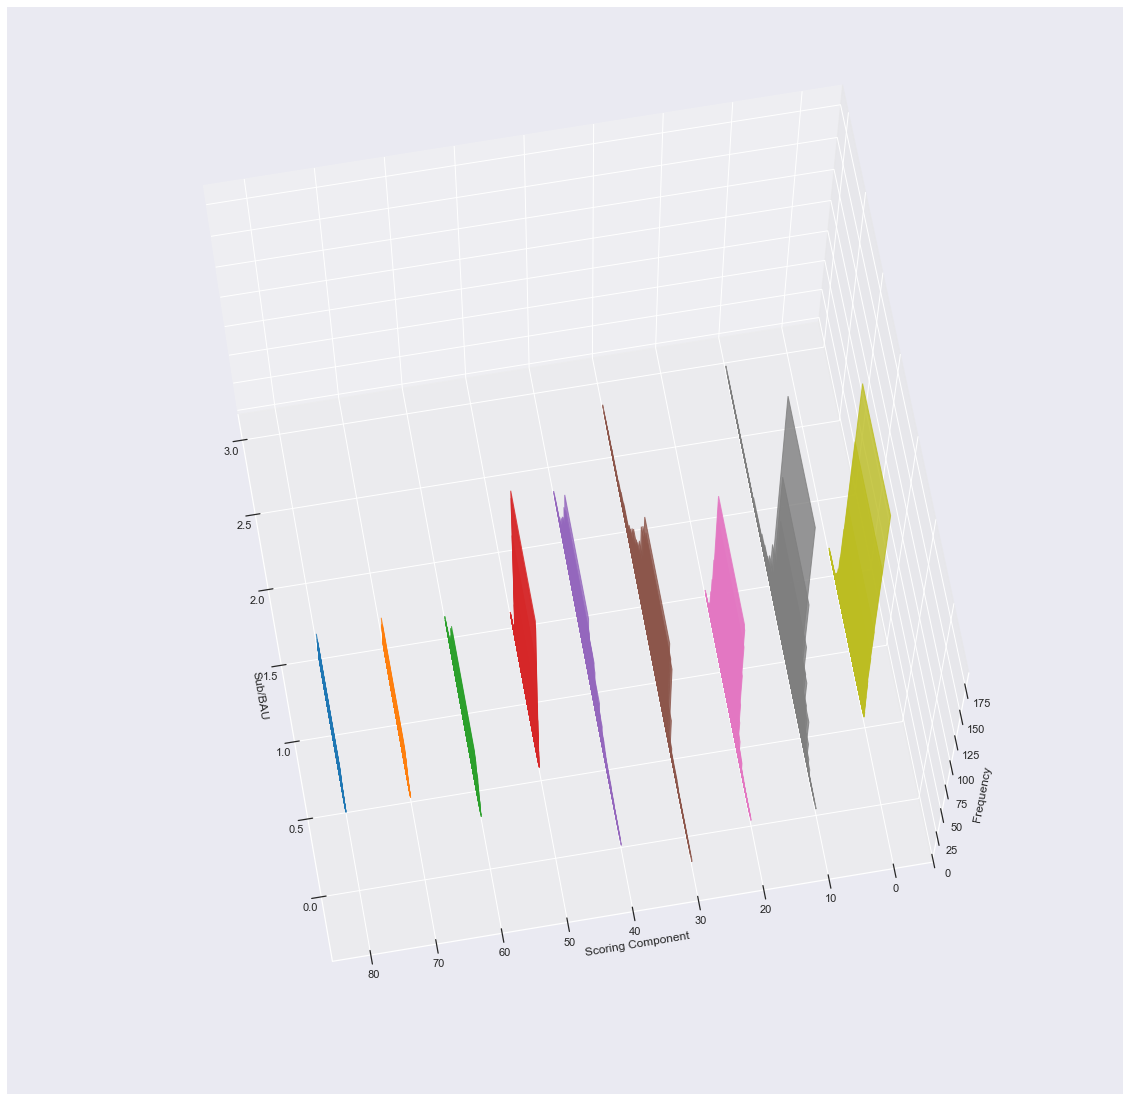

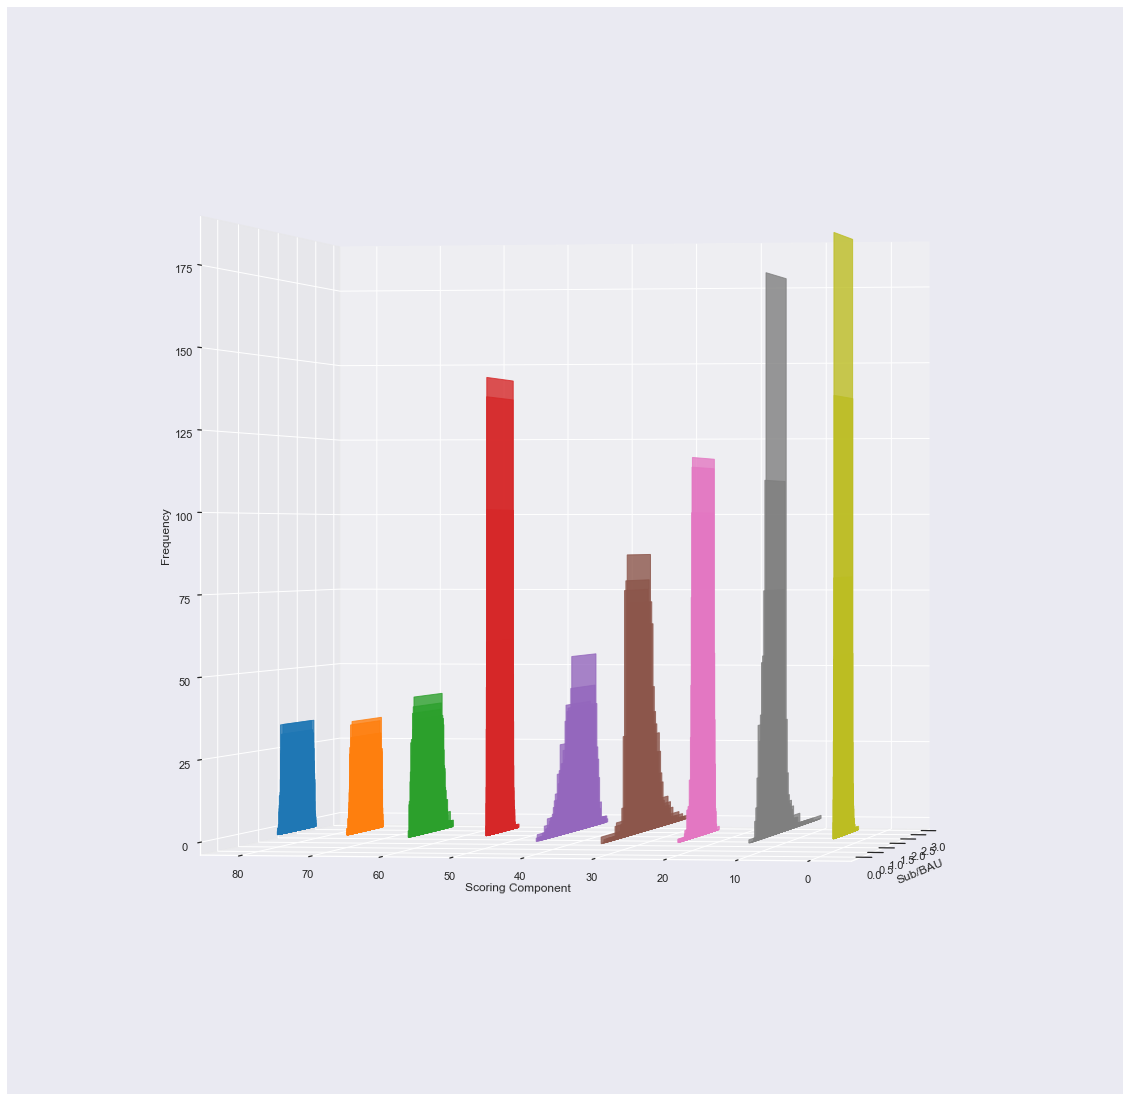

In [1076]:
colors = sns.color_palette("tab10",10)



views = [(70,170),(0,190)]

for m,n in enumerate(views):
    fig = plt.figure(num=m,figsize=(20,20))
    ax = fig.add_subplot(1,1,1, projection='3d')
    nbins = 50
    for i,z in enumerate([80,70,60,50,40,30, 20, 10, 0]):
        ys = wide_scores.T.iloc[i]

        hist, bins = np.histogram(ys, bins=nbins)
        xs = (bins[:-1] + bins[1:])/2

        ax.bar(xs, hist, zs=z, zdir='y', color=colors[i], ec=colors[i], alpha=0.8)

    ax.set_xlabel('Sub/BAU')
    ax.set_ylabel('Scoring Component')
    ax.set_zlabel('Frequency')

# ax.set_yticklabels(['A','B','C','D','E','F','G','H','I','J'])

    ax.view_init(n[0], n[1])
    plt.show()



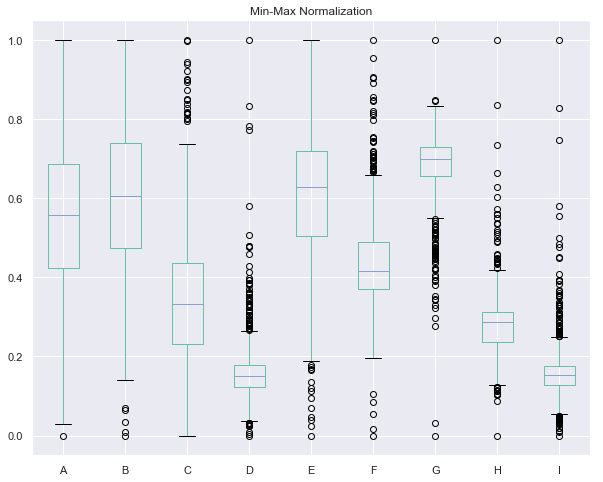

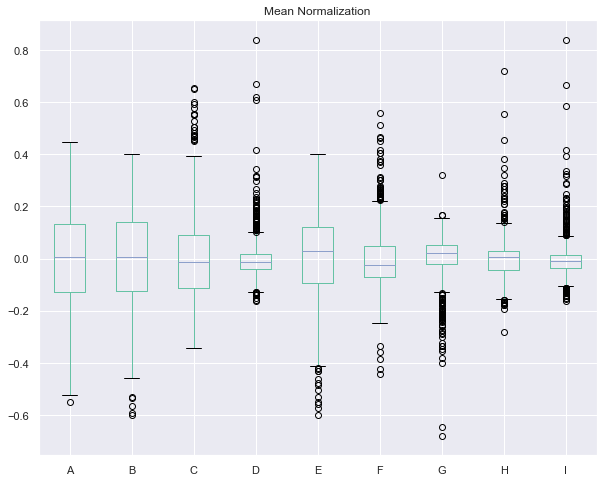

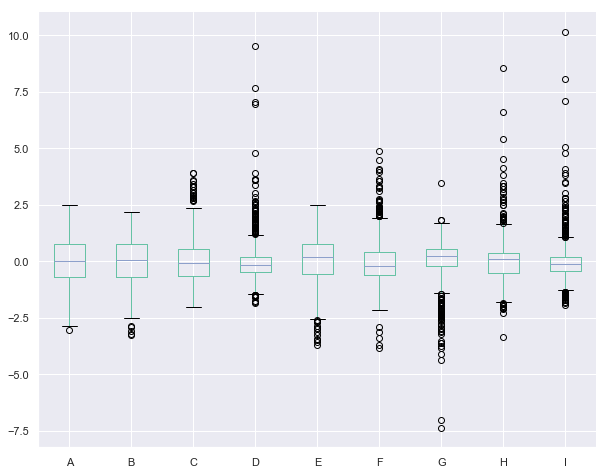

In [1077]:
columns = ['A','B','C','D','E','F','G','H','I']
mins = np.nanmin(wide_scores.values.astype(float),axis=0)
maxs = np.nanmax(wide_scores.values.astype(float),axis=0)
denom = maxs-mins
means = np.nanmean(wide_scores.values,axis=0)
variances = wide_scores.values.var(axis=0)
stds = wide_scores.values.std(axis=0)

# min-max normalization
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
sns.set_palette('Set2')
pd.DataFrame((wide_scores.values-mins)/denom,columns=columns).plot(kind='box',title='Min-Max Normalization',ax=ax)
plt.savefig('img/min_max_norm.png',format='png',dpi=150)
plt.show()

# mean normalization
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
sns.set_palette('Set2')
pd.DataFrame((wide_scores.values-means)/denom,columns=columns).plot(kind='box',title='Mean Normalization',ax=ax)
plt.savefig('img/mean_norm.png',format='png',dpi=150)
plt.show()

# standardization
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
sns.set_palette('Set2')
pd.DataFrame(((wide_scores.values-means)/stds),columns=columns).plot(kind='box',ax=ax)
sns.despine()
plt.savefig('img/standardization.png',format='png',dpi=150)
plt.show()

In [1078]:
dict(zip(columns,wide_scores.columns.values))

{'A': 'Accessibility: Number of secondary locations accessible within 15 minutes',
 'B': 'Accessibility: Number of work locations accessible within 15 minutes',
 'C': 'Congestion: average vehicle delay per passenger trip',
 'D': 'Congestion: total vehicle miles traveled',
 'E': 'Level of service: average bus crowding experienced',
 'F': 'Level of service: average trip expenditure - secondary',
 'G': 'Level of service: average trip expenditure - work',
 'H': 'Level of service: costs and benefits',
 'I': 'Sustainability: Total PM 2.5 Emissions'}

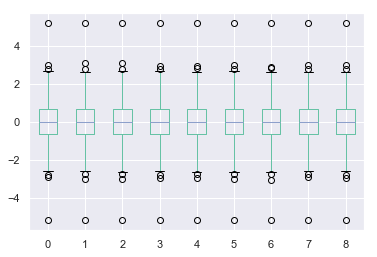

In [1079]:
from sklearn.preprocessing import *
transformer = QuantileTransformer(output_distribution='normal')
fitted = transformer.fit(wide_scores.values)
pd.DataFrame(fitted.transform(wide_scores.values)).plot(kind='box')



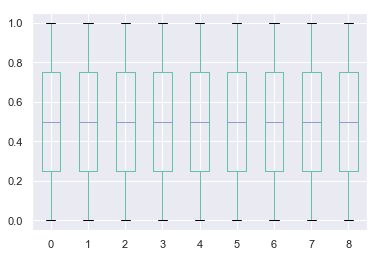

In [1080]:
transformer = QuantileTransformer(output_distribution='uniform')
fitted = transformer.fit(wide_scores.values)
pd.DataFrame(fitted.transform(wide_scores.values)).plot(kind='box')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


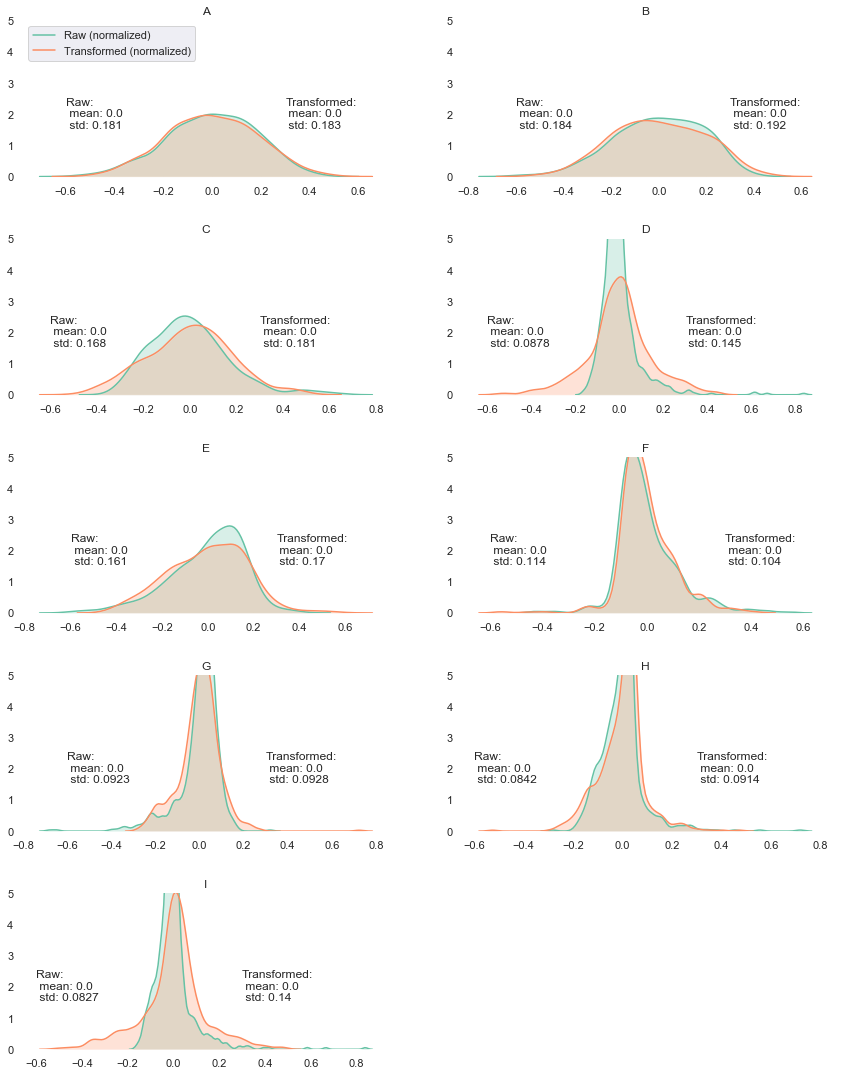

In [1081]:
import scipy.stats as ss
sns.set_palette('Set2')

fig,axes=plt.subplots(5,2,figsize=(12,15))
fig.tight_layout()
plt.subplots_adjust(wspace=0.2, hspace=0.4)

i = 0
for m in range(5):
    for n in range(2):
        if i >= wide_scores.shape[1]:
            break
        ax = axes[m][n]
        x = wide_scores.T.iloc[i].values
        xt, maxlog, interval=ss.boxcox(x,alpha=0.05)

        x1=x.reshape(x.shape[0])
        x1=(x1 - x1.mean()) / (x1.max() - x1.min())

        xt1=xt.reshape(x.shape[0])
        xt1=(xt1 - xt1.mean()) / (xt1.max() - xt1.min())

        sns.kdeplot(x1, shade=True, label="Raw (normalized)" ,ax=ax);
        sns.kdeplot(xt1, shade=True, label="Transformed (normalized)" ,ax=ax);

        ax.set_frame_on(False)
        ax.set_title(columns[i])
        ax.set_ylim(0.0,5.0)
        ax.annotate('Raw:\n mean: 0.0\n std: {:.3}'.format(x1.std()),(-0.6,1.55))
        ax.annotate('Transformed:\n mean: 0.0\n std: {:.3}'.format(xt1.std()),(0.3,1.55))
        if i == wide_scores.shape[1]-1:
            fig.delaxes(axes[m,n+1])
        if i!=0:
            ax.get_legend().remove()
        else:
            ax.legend(loc='upper left')
        i+=1


In [1082]:
def make_subset_score_df(fn, score_df):
    subset_score_series = score_df.iloc[fn(score_df.values,0)]
    worst_score_names = pd.Series(dict(zip(subset_score_series.columns.values.tolist(),subset_score_series.index.values.tolist())))
    worst_score_values = pd.Series(dict(zip(subset_score_series.columns.values.tolist(),np.diag(subset_score_series.values.tolist()))))
    df=pd.DataFrame({"Sample Names":worst_score_names,"Score Values":worst_score_values})
    return df

In [1083]:
wide_scores

Component Name,Accessibility: Number of secondary locations accessible within 15 minutes,Accessibility: Number of work locations accessible within 15 minutes,Congestion: average vehicle delay per passenger trip,Congestion: total vehicle miles traveled,Level of service: average bus crowding experienced,Level of service: average trip expenditure - secondary,Level of service: average trip expenditure - work,Level of service: costs and benefits,Sustainability: Total PM 2.5 Emissions
output_key,,,,,,,,,
C9_RS100-35doce5_,0.948264,0.983266,0.779279,0.994843,1.088922,1.676636,0.918510,0.779521,0.987111
C9_RS14-ubzwgfj8,0.986929,1.029800,1.072052,0.990312,1.546437,0.698263,0.895512,0.996810,0.988323
C9_RS16-w6ac_694,1.009086,1.046422,0.873212,0.993218,1.410605,0.988331,0.941332,1.078028,0.993434
C9_RS17-jrnmi11g,1.007157,1.049645,0.793218,0.994034,1.566478,1.285489,0.891623,1.022276,0.994223
C9_RS2-53hd2z7l,1.054144,1.069125,0.897844,1.015121,0.981085,1.169834,0.937811,1.315102,1.022567
C9_RS20-5bo9bcng,0.946750,0.982789,0.891868,0.984665,1.288223,1.118159,0.887023,0.980404,0.981555
C9_RS21-iho44svf,0.969171,0.989057,0.983726,1.010453,1.100428,2.015441,0.917665,0.858400,1.010121
C9_RS24-22w9tepd,1.023314,1.059825,0.917506,1.032392,0.644385,1.127864,0.888962,1.462431,1.043980
C9_RS25-tzzvv15p,0.975433,1.039130,0.894667,0.967657,1.782708,1.127726,0.935051,0.736403,0.952388


In [1084]:
worst_scores = make_subset_score_df(np.argmax,wide_scores)
worst_scores

,Sample Names,Score Values
Accessibility: Number of secondary locations accessible within 15 minutes,C9_RS50-byo23542,1.086614
Accessibility: Number of work locations accessible within 15 minutes,C9_RS99-l4tsnmqq,1.104022
Congestion: average vehicle delay per passenger trip,C9_RS49-vj060x6v,1.210922
Congestion: total vehicle miles traveled,C9_RS56-8bgh29m5,1.174460
Level of service: average bus crowding experienced,C9_RS95-h08mnlwx,1.921575
Level of service: average trip expenditure - secondary,C9_RS92-wvs6apqz,2.441146
Level of service: average trip expenditure - work,C9_RS88-xbntxa0h,1.117890
Level of service: costs and benefits,C9_RS56-8bgh29m5,2.566811
Sustainability: Total PM 2.5 Emissions,C9_RS56-8bgh29m5,1.255284


In [1031]:
best_scores = make_subset_score_df(np.argmin,wide_scores)
best_scores

,Sample Names,Score Values
Accessibility: Number of secondary locations accessible within 15 minutes,C9_RS14-_hrohhf8,0.853730
Accessibility: Number of work locations accessible within 15 minutes,C9_RS14-_hrohhf8,0.843599
Congestion: average vehicle delay per passenger trip,C9_RS52-x3hmf6x9,0.751564
Congestion: total vehicle miles traveled,C9_RS5-zv5fidtb,0.978326
Level of service: average bus crowding experienced,C9_RS12-cokkcf8n,0.570311
Level of service: average trip expenditure - secondary,C9_RS98-lr5majry,0.275846
Level of service: average trip expenditure - work,C9_RS14-_hrohhf8,0.528667
Level of service: costs and benefits,C9_RS99-fodhk46j,0.633337
Sustainability: Total PM 2.5 Emissions,C9_RS81-k_2e3bzx,0.964094


In [1032]:
sc_fit = StandardScaler().fit(wide_scores.values)
transformed_scores=sc_fit.transform(wide_scores)

In [1033]:
transformed_scores=pd.DataFrame(columns = wide_scores.columns,data=transformed_scores)
transformed_scores.set_index(wide_scores.index,inplace=True)

In [1088]:
transformed_scores.mean(axis=1).sort_values(ascending=True)

output_key
C9_RS6-a3suh32s    -1.213811
C9_RS46-hdea8e8t   -1.113157
C9_RS26-7pus9_d_   -0.952797
C9_RS86-epuwre73   -0.906183
C9_RS15-oxk8g5on   -0.906011
C9_RS30-jkio33z3   -0.894805
C9_RS99-_xly5927   -0.893058
C9_RS17-eri9qhem   -0.875289
C9_RS68-m2szbb9x   -0.869399
C9_RS65-c2n9lb2v   -0.850760
C9_RS11-d5f4pdmi   -0.831882
C9_RS14-_hrohhf8   -0.822200
C9_RS5-zv5fidtb    -0.799766
C9_RS8-8799kl4j    -0.787185
C9_RS46-3_kyi5ys   -0.785899
C9_RS61-59nitgv7   -0.781119
C9_RS64-py4tq4rb   -0.780809
C9_RS81-eqqf2z51   -0.777054
C9_RS88-sk0w3xri   -0.769138
C9_RS77-p33iyr8z   -0.748890
C9_RS94-381hl3i2   -0.743469
C9_RS6-nlmykxrn    -0.726444
C9_RS63-9_cnf5hb   -0.713627
C9_RS62-fzx1kbci   -0.711291
C9_RS93-jigrdw83   -0.708475
C9_RS22-qv_uwqqf   -0.697702
C9_RS23-2w5w9_8w   -0.693254
C9_RS77-qkndibxf   -0.670303
C9_RS66-uuky5az1   -0.662273
C9_RS60-yzsze5dd   -0.658440
                      ...   
C9_RS51-i_349r_w    0.648178
C9_RS89-qsbs1gs0    0.664441
C9_RS57-qipaj_ld    0.671499
C9_

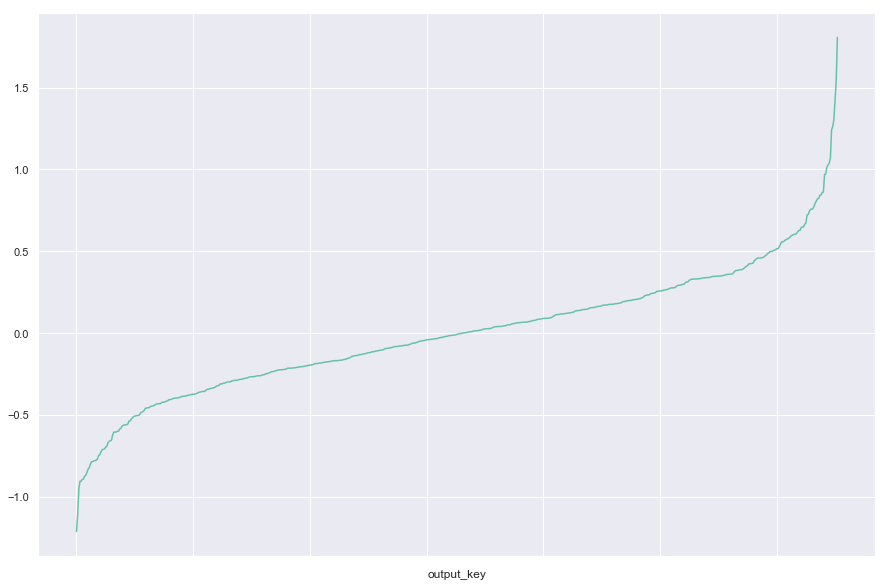

In [1034]:
fig, ax = plt.subplots()
fig.set_size_inches(15,10)
transformed_scores.mean(axis=1).sort_values().plot(ax=ax)

In [1060]:
full_transformed_scores = transformed_scores.mean(axis=1)
top_full_scores = full_transformed_scores.sort_values()

In [1061]:
top_scores = transformed_scores.loc[top_full_scores.index]

In [1062]:
top_full_scores

output_key
C9_RS6-a3suh32s    -1.213811
C9_RS46-hdea8e8t   -1.113157
C9_RS26-7pus9_d_   -0.952797
C9_RS86-epuwre73   -0.906183
C9_RS15-oxk8g5on   -0.906011
C9_RS30-jkio33z3   -0.894805
C9_RS99-_xly5927   -0.893058
C9_RS17-eri9qhem   -0.875289
C9_RS68-m2szbb9x   -0.869399
C9_RS65-c2n9lb2v   -0.850760
C9_RS11-d5f4pdmi   -0.831882
C9_RS14-_hrohhf8   -0.822200
C9_RS5-zv5fidtb    -0.799766
C9_RS8-8799kl4j    -0.787185
C9_RS46-3_kyi5ys   -0.785899
C9_RS61-59nitgv7   -0.781119
C9_RS64-py4tq4rb   -0.780809
C9_RS81-eqqf2z51   -0.777054
C9_RS88-sk0w3xri   -0.769138
C9_RS77-p33iyr8z   -0.748890
C9_RS94-381hl3i2   -0.743469
C9_RS6-nlmykxrn    -0.726444
C9_RS63-9_cnf5hb   -0.713627
C9_RS62-fzx1kbci   -0.711291
C9_RS93-jigrdw83   -0.708475
C9_RS22-qv_uwqqf   -0.697702
C9_RS23-2w5w9_8w   -0.693254
C9_RS77-qkndibxf   -0.670303
C9_RS66-uuky5az1   -0.662273
C9_RS60-yzsze5dd   -0.658440
                      ...   
C9_RS51-i_349r_w    0.648178
C9_RS89-qsbs1gs0    0.664441
C9_RS57-qipaj_ld    0.671499
C9_

In [1038]:
top_full_scores.pct_change()[:20].dropna().sort_values()

output_key
C9_RS26-7pus9_d_   -0.144059
C9_RS46-hdea8e8t   -0.082924
C9_RS86-epuwre73   -0.048924
C9_RS5-zv5fidtb    -0.027285
C9_RS77-p33iyr8z   -0.026326
C9_RS11-d5f4pdmi   -0.022190
C9_RS65-c2n9lb2v   -0.021439
C9_RS17-eri9qhem   -0.019897
C9_RS8-8799kl4j    -0.015731
C9_RS30-jkio33z3   -0.012368
C9_RS14-_hrohhf8   -0.011638
C9_RS88-sk0w3xri   -0.010187
C9_RS68-m2szbb9x   -0.006730
C9_RS61-59nitgv7   -0.006082
C9_RS81-eqqf2z51   -0.004809
C9_RS99-_xly5927   -0.001952
C9_RS46-3_kyi5ys   -0.001634
C9_RS64-py4tq4rb   -0.000397
C9_RS15-oxk8g5on   -0.000190
dtype: float64

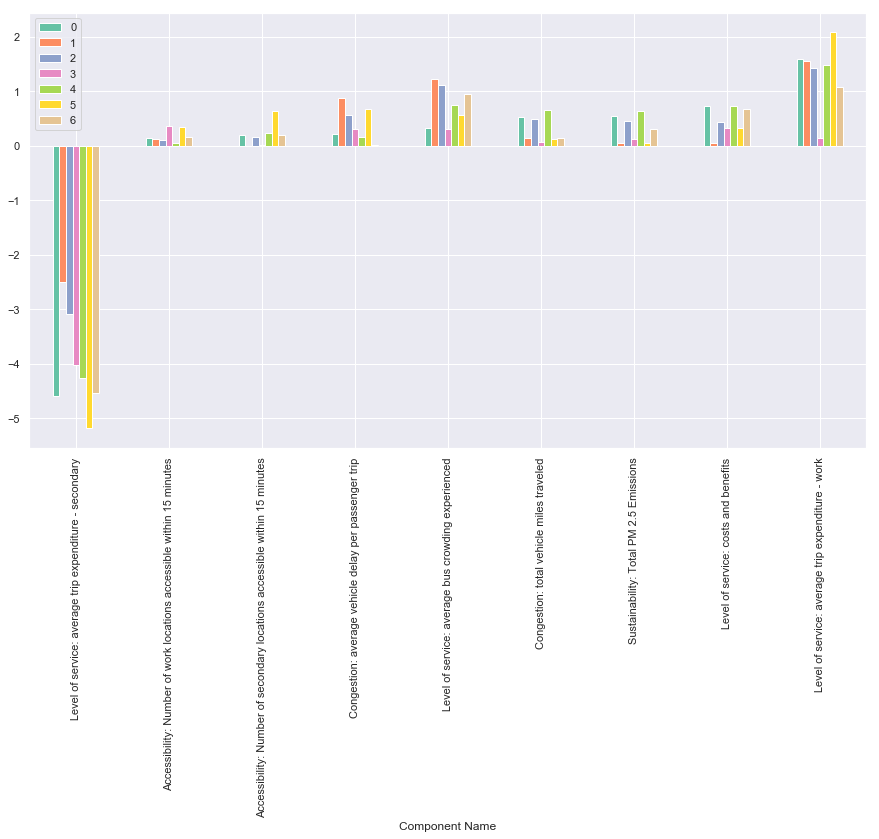

In [1039]:

fig, ax = plt.subplots()
fig.set_size_inches(15,8)

top_pct=pd.concat([-np.abs(top_scores.iloc[0]-top_scores.iloc[i])/(2*top_scores.iloc[0]) for i in range(1,8)],axis=1).sort_values(by=[0],axis=0).plot(kind='bar',ax=ax,label='Sample Order')


/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


KeyboardInterrupt: 

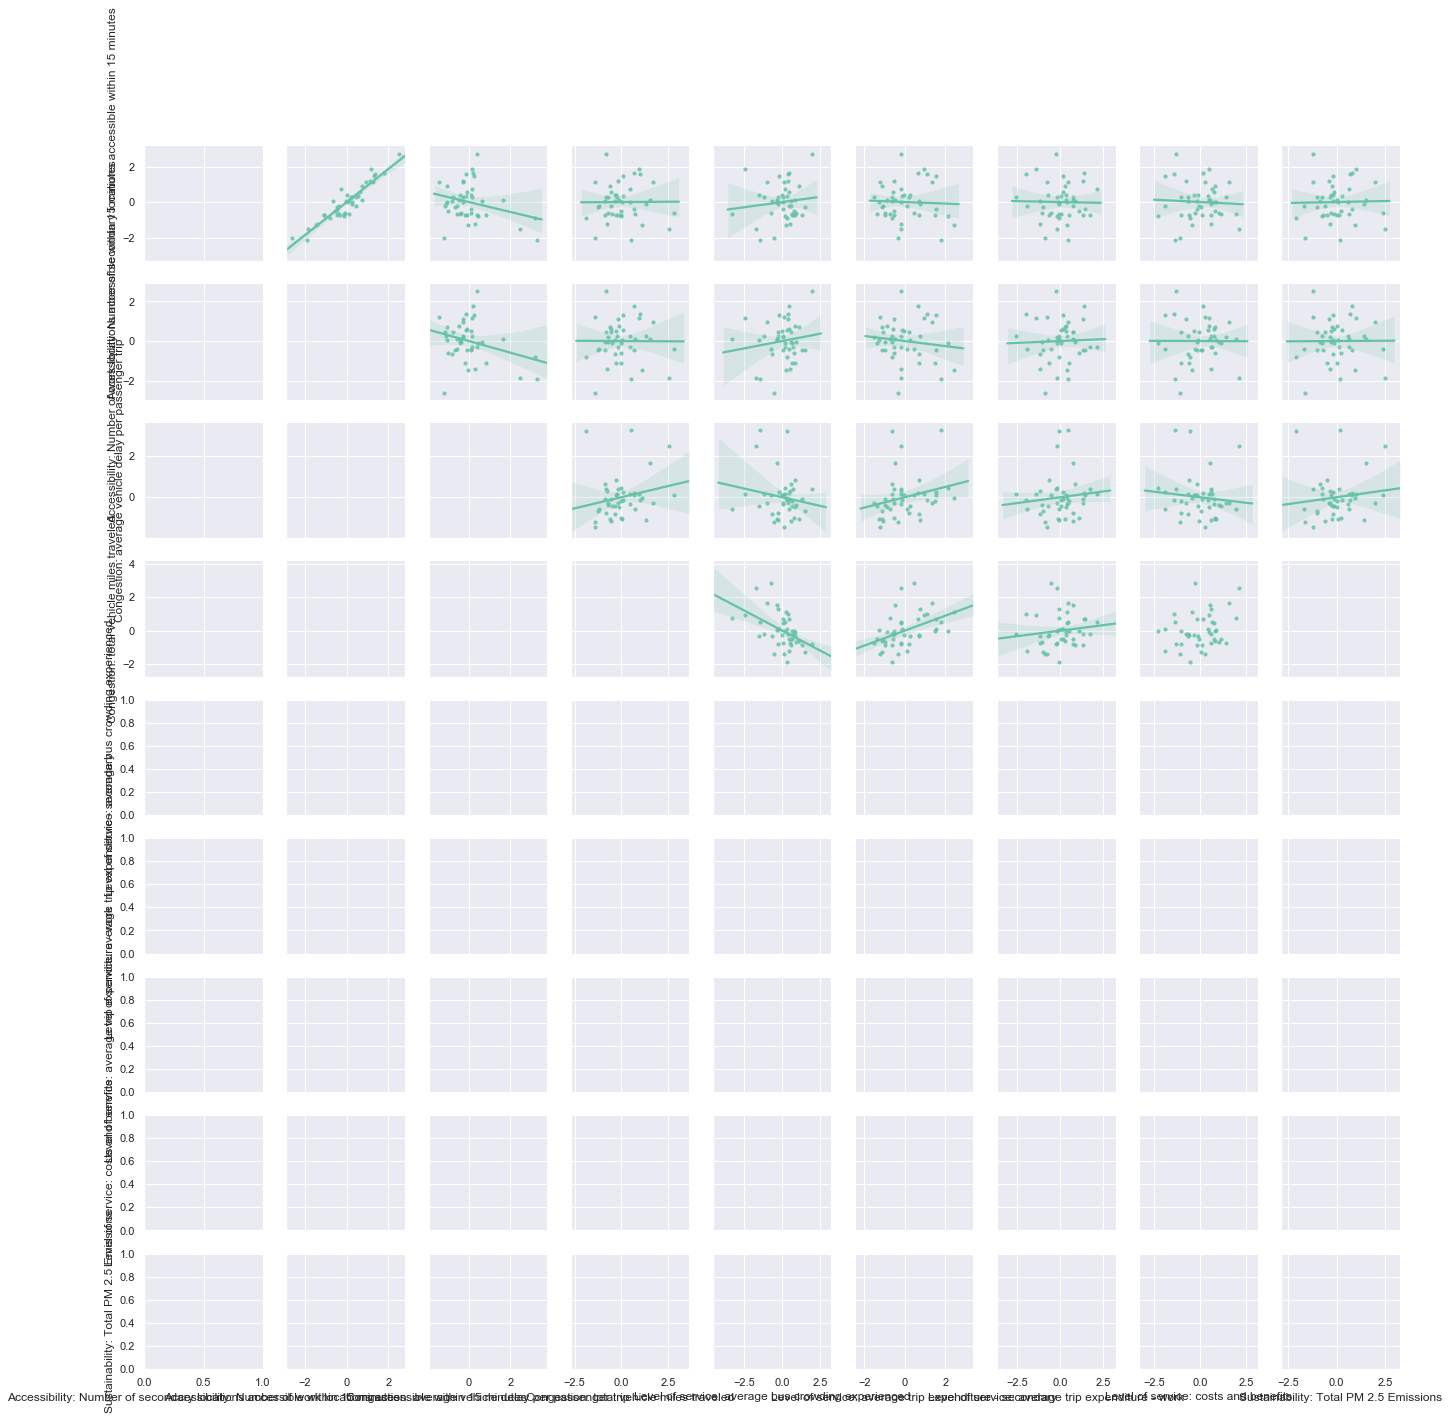

In [791]:
import scipy.stats as stats
def corrfunc(x, y, **kws):
    r, p = stats.pearsonr(x, y)
    p_stars = ''
    if p <= 0.05:
        p_stars = '*'
    if p <= 0.01:
        p_stars = '**'
    if p <= 0.001:
        p_stars = '***'
    ax = plt.gca()
    ax.annotate('r = {:.2f} '.format(r) + p_stars,
              xy=(0.05, 0.9), xycoords=ax.transAxes)

def cor_matrix(df):
    g = sns.PairGrid(df, palette=['red'])
    # Use normal regplot as `lowess=True` doesn't provide CIs.
    g.map_upper(sns.regplot, scatter_kws={'s':10})
    g.map_diag(sns.distplot)
    g.map_lower(sns.kdeplot, cmap='Blues_d')
    g.map_lower(corrfunc)
    # Remove axis labels, as they're in the diagonals.
    for ax in g.axes.flatten():
        ax.set_ylabel('')
        ax.set_xlabel('')
        # Add titles to the diagonal axes/subplots
    for ax, col in zip(np.diag(g.axes), columns):
        ax.set_title(col, y=0.52, fontsize=26)
    return g



cor_matrix(transformed_scores)

In [1040]:
from sklearn.decomposition import PCA

In [1041]:
# wide_scores['submission_score']=wide_scores.mean(axis=1)
pca = PCA().fit(transformed_scores)

In [1042]:
pca.components_[-2]*transformed_scores

Component Name,Accessibility: Number of secondary locations accessible within 15 minutes,Accessibility: Number of work locations accessible within 15 minutes,Congestion: average vehicle delay per passenger trip,Congestion: total vehicle miles traveled,Level of service: average bus crowding experienced,Level of service: average trip expenditure - secondary,Level of service: average trip expenditure - work,Level of service: costs and benefits,Sustainability: Total PM 2.5 Emissions
output_key,,,,,,,,,
C9_RS1-l_tl9p8_,-0.202466,0.248394,-0.001658,-0.013129,-0.000635,0.044864,0.127291,-0.026505,-0.020150
C9_RS10-6k3ifbp3,-0.286431,0.325400,0.018648,0.004769,-0.025633,-0.001406,0.101542,0.009873,0.000140
C9_RS3-pob2z0a3,0.391191,-0.119282,0.008297,0.012920,0.056178,0.016576,-0.045842,-0.023185,0.016502
C9_RS4-1qx9pbel,-0.815643,0.920362,-0.005447,0.024612,-0.015512,0.006470,-0.082727,0.001784,0.022634
C9_RS5-4ydn6l0r,0.937491,-0.904357,0.005842,0.009893,-0.010214,-0.000829,0.119617,-0.048459,0.024023
C9_RS7-evi6xaja,0.302805,-0.242491,0.005191,0.023995,0.000469,-0.023038,-0.001325,0.032444,0.021935
C9_RS8-lbgm1azh,-0.065004,-0.412714,0.021794,0.018507,-0.018050,-0.013115,0.071180,-0.021584,0.031912
C9_RS9-jz1axs77,-0.578544,0.479857,-0.059090,0.054717,-0.009024,-0.003502,0.007404,-0.039293,0.089859
C9_RS1-82tjcp0m,-0.131367,0.233109,0.012844,0.038001,-0.050722,-0.014351,-0.067589,-0.018764,0.049675


Text(0.5, 0, 'Number of components')

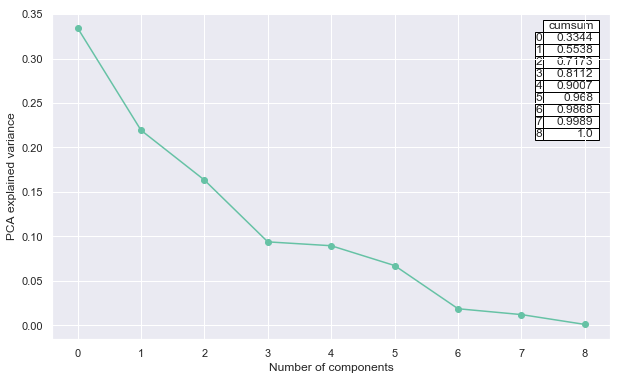

In [1043]:
from pandas.plotting import table
fig, axes = plt.subplots(nrows=1, figsize=(10, 6))
table(axes,pd.DataFrame(np.round(np.cumsum(pca.explained_variance_ratio_),4),
                        columns=['cumsum']),
      loc='upper right', colWidths=[0.1])
axes.plot(pca.explained_variance_ratio_,"o-")
axes.set_ylabel('PCA explained variance')
axes.set_xlabel('Number of components')


In [1044]:
def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    
    summary = pd.DataFrame({'a':a, 'b':b, 'c':c}, index=names)
    summary.columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    if out:
        print("Importance of components:")
        display(summary)
    return summary

def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()


In [1045]:
list(np.std(pca.transform(transformed_scores),axis=0))

[1.734845354510581,
 1.4052973812835459,
 1.2127719032376738,
 0.9193279915002766,
 0.8978196923514484,
 0.778169019712261,
 0.4106293981801036,
 0.33067035792698557,
 0.09942137283649626]

In [1046]:
summary=pca_summary(pca,transformed_scores,False)
np.sum(summary.sdev**2)

Standard deviation    9.0
dtype: float64

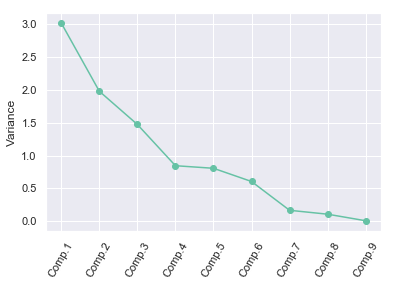

In [1047]:
screeplot(pca,transformed_scores)

In [1048]:
summary

,sdev,varprop,cumprop
,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,1.734845,0.334410,0.334410
PC2,1.405297,0.219429,0.553839
PC3,1.212772,0.163424,0.717263
PC4,0.919328,0.093907,0.811170
PC5,0.897820,0.089564,0.900734
PC6,0.778169,0.067283,0.968017
PC7,0.410629,0.018735,0.986753
PC8,0.330670,0.012149,0.998902
PC9,0.099421,0.001098,1.000000


In [591]:
sample1_key = "C9_RS56-8bgh29m5" # host4
sample2_key = "C9_RS9-53lbiedo"  # host8

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')


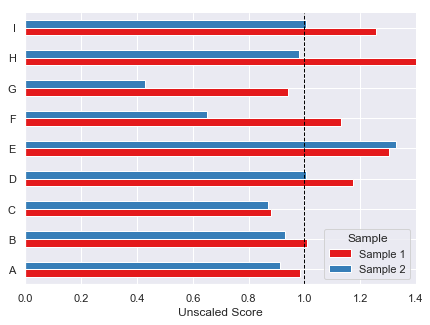

In [592]:
sns.set_context('notebook')
sns.set_palette('Set1')
fig, ax = plt.subplots()
fig.set_size_inches(7,5)

sample1 = pd.Series(dict(zip(wide_scores.columns.tolist(),np.squeeze(wide_scores.loc[sample1_key].values.reshape(1, -1)).tolist())))
sample2 = pd.Series(dict(zip(wide_scores.columns.tolist(),np.squeeze(wide_scores.loc[sample2_key].values.reshape(1, -1)).tolist())))


std_raw_scores = pd.DataFrame({"Sample 1":sample1,"Sample 2":sample2})
# sns.barplot(data=std_raw_scores)
std_raw_scores.index.name="Score Component"
std_raw_scores.columns.name='Sample'
std_raw_scores.index=['A','B','C','D','E','F','G','H','I']
std_raw_scores.plot(kind='barh',ax=ax)
plt.axvline(x=1.0,linewidth=1, color='k', ls='dashed', label = "baseline")
plt.xlabel("Unscaled Score")
plt.xlim(xmax = 1.4)
sns.despine()
plt.savefig('img/random_inputs/unscaled_sample_scores.png',format='png',dpi=150,bbox_inches="tight")

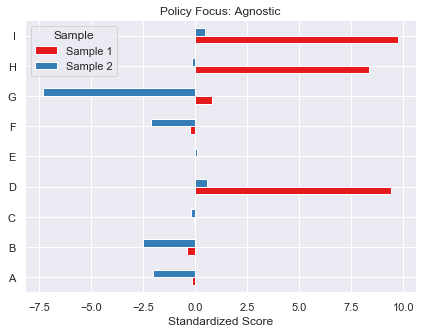

In [593]:
sns.set_context('notebook')
sns.set_palette('Set1')
fig, ax = plt.subplots()
fig.set_size_inches(7,5)


sc_fit = StandardScaler().fit(wide_scores.values)
sample1 = pd.Series(dict(zip(wide_scores.columns.tolist(),np.squeeze(sc_fit.transform(wide_scores.loc[sample1_key].values.reshape(1, -1))).tolist())))
sample2 = pd.Series(dict(zip(wide_scores.columns.tolist(),np.squeeze(sc_fit.transform(wide_scores.loc[sample2_key].values.reshape(1, -1))).tolist())))

# flip accessibility:
# sample1.iloc[0:2]=np.reciprocal(sample1.iloc[0:2])

std_raw_scores = pd.DataFrame({"Sample 1":sample1,"Sample 2":sample2})
# sns.barplot(data=std_raw_scores)
std_raw_scores.index.name="Score Component"
std_raw_scores.columns.name='Sample'
std_raw_scores.index=['A','B','C','D','E','F','G','H','I']
std_raw_scores.plot(kind='barh',ax=ax)
# plt.axvline(x=1.0,linewidth=1, color='k', ls='dashed', label = "baseline")
plt.xlabel("Standardized Score")
ax.set_title('Policy Focus: Agnostic')
# plt.xlim(right = 0.7,left=-0.7)

sns.despine()
plt.savefig('img/random_inputs/Policy Agnostic_standardized_scores.png',format='png',dpi=150,bbox_inches="tight")
# plt.xlim(xmax = 1.4)

In [594]:
wt_df = pd.read_csv('policy_weights.csv',index_col=0)

In [595]:
wt_denom = wt_df.sum(axis=1)
wt_norm = (wt_df.T/wt_denom).T
sample1_wt = wt_norm*sample1
sample2_wt = wt_norm*sample2

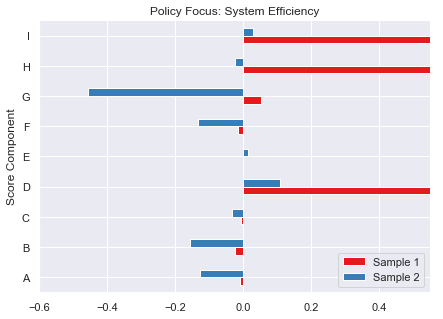

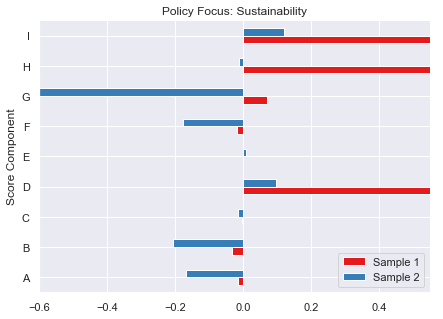

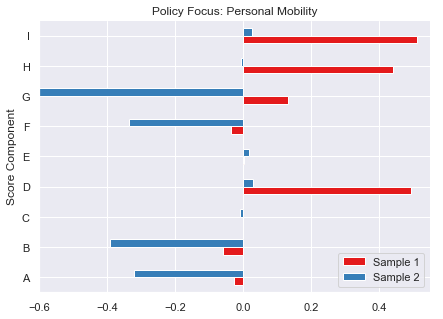

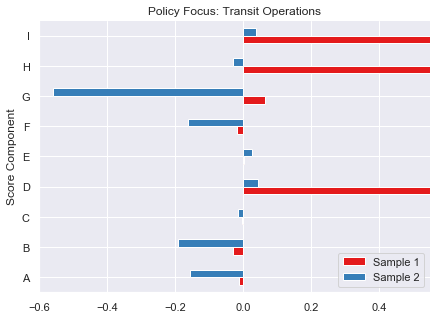

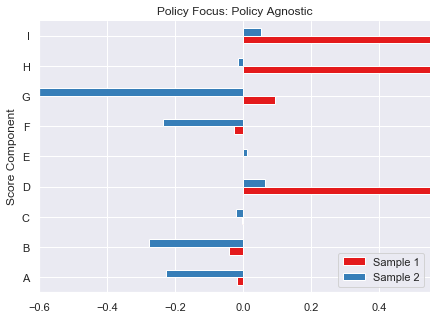

In [596]:
dfs = []

for policy in sample1_wt.index.values:
    sns.set_context('notebook')
    sns.set_palette('Set1')
    fig, ax = plt.subplots()
    fig.set_size_inches(7,5)
    std_wt_scores = pd.DataFrame({"Sample 1":sample1_wt.loc[policy].T,"Sample 2":sample2_wt.loc[policy].T})

    std_wt_scores.index=['A','B','C','D','E','F','G','H','I']
    std_wt_scores.index.name="Score Component"
    std_wt_scores.columns.name='Sample'
    dfs.append(std_wt_scores)
    std_wt_scores.plot(kind='barh',ax=ax)
    ax.set_title('Policy Focus: {}'.format(policy.title()))
    plt.xlim(right = 0.55,left=-0.6)
    sns.despine()
    plt.legend(loc='lower right')
    plt.savefig('img/random_inputs/{}_standardized_sample_scores.png'.format(policy),format='png',dpi=150,bbox_inches="tight")

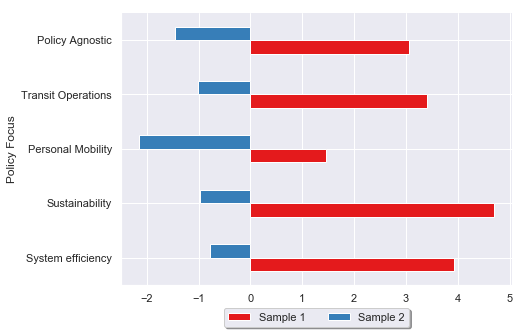

In [605]:
full_df = pd.concat(dfs,axis=1,keys=wt_df.index)
sns.set_context('notebook')
sns.set_palette('Set1')
fig, ax = plt.subplots()
fig.set_size_inches(7,5)
sns.despine()
final_scores = full_df.sum(axis=0).unstack().plot(kind='barh',ax=ax,legend=True)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.175),
          ncol=3, fancybox=True, shadow=True)

plt.savefig('img/random_inputs/final_scores.png',format='png',dpi=150,bbox_inches="tight")

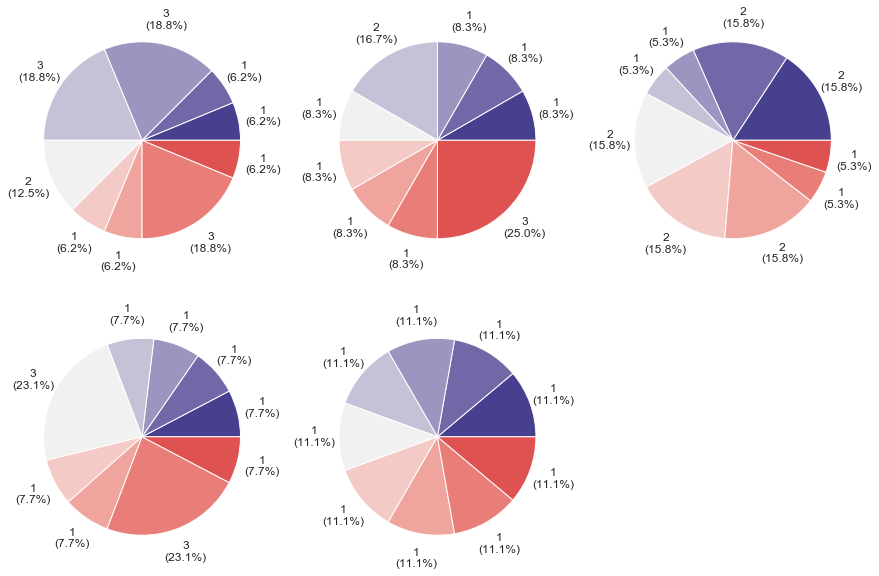

In [599]:
import matplotlib.patches as mpatches


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:d}\n({:.1f}%)".format(absolute, pct)


colors=["#46408f",
"#7368a7",
"#9d94c0",
"#c7c1d8",
"#f1f1f1",
"#f3cac6",
'#f0a49e',
'#e97d77',
"#de5252"]

leg_patches = [mpatches.Patch(color=c) for c in colors]
leg_labels = wt_norm.columns.values

leg_iter = zip(leg_patches,leg_labels)

p=0
fig, axes = plt.subplots(2, 3, sharex=True, figsize=(15,10))
for i in range(2):
    for j in range(3):
        ax = axes[i,j]
        if p > 4:

            fig.delaxes(axes[i,j])
            break

            
        ax.pie(x=wt_df.iloc[p],colors=colors, autopct=lambda pct: func(pct, wt_df.iloc[p]),pctdistance=1.25)

        p+=1
        


# axes=wt_df.T.plot.pie(subplots=True,colors=colors,autopct='%.2f', figsize=(15, 10),labels=['A','B','C','D','E','F','G','H','I'],layout=(2,3))
# axes[-1][-1].legend(handles=leg_patches,labels=leg_labels,loc="lower center")


In [602]:
root = "/Users/sfeygi/current_code/others/prize_starter_kit/utilities/policy_inputs"
suff = "/submissionScores.csv"

score_data = {"Increased Bus Frequency" : root+"/increased_bus_frequency"+suff,
"No Transit" : root+"/no_transit"+suff,
"Redistributive: Transit and On-Demand" : root + "/redistributive_transit_on_demand"+suff}

score_dfs = {score_type:pd.read_csv(csv,index_col=0).drop("Submission Score",axis=0)["Raw Score"] for score_type,csv in score_data.items()}


FileNotFoundError: File b'/Users/sfeygi/current_code/others/prize_starter_kit/utilities/policy_inputs/increased_bus_frequency/submissionScores.csv' does not exist

In [509]:
for k,v in score_dfs.items():
    v.loc["Input Policy Type"] = k

In [510]:
policy_scores_df = pd.concat(score_dfs.values(),axis=1,sort=True).T
policy_scores_df = policy_scores_df.set_index("Input Policy Type")
policy_scores = policy_scores_df
policy_scores.iloc[:,:2]=np.reciprocal(policy_scores.iloc[:,:2])
policy_scores['Level of service: costs and benefits'] = np.reciprocal(policy_scores['Level of service: costs and benefits'])
policy_scores = pd.DataFrame(sc_fit.transform(policy_scores),columns=policy_scores.columns,index=policy_scores.index)
policy_scores.drop('Level of service: average on-demand ride wait times',axis=1,inplace=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  


In [511]:
s1 = wt_norm*policy_scores.iloc[0]
s2 = wt_norm*policy_scores.iloc[1]
s3 = wt_norm*policy_scores.iloc[2]

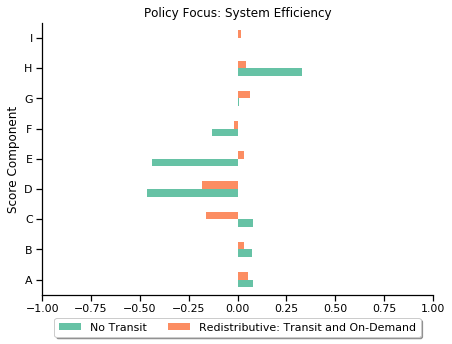

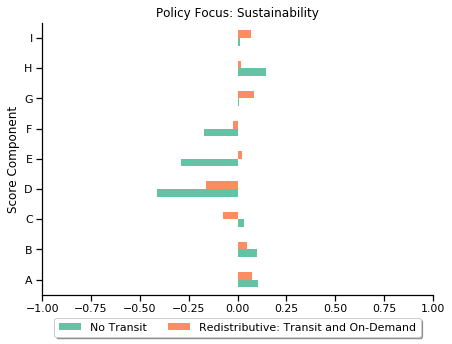

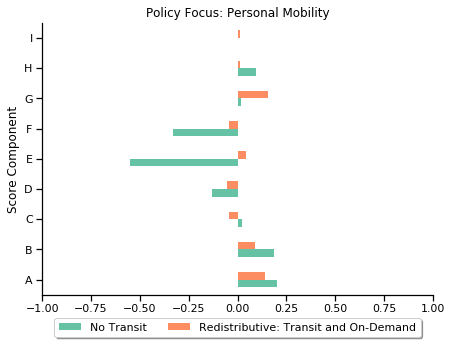

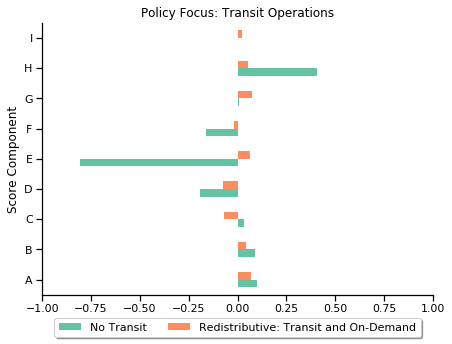

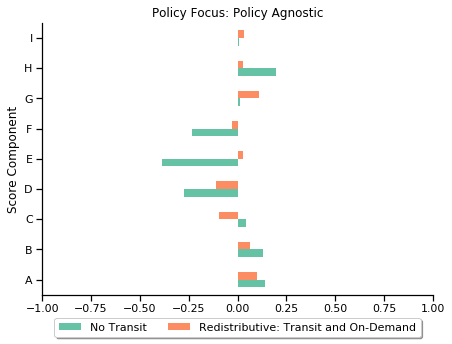

In [512]:
dfs = []
for policy in sample1_wt.index.values:
    sns.set_context('notebook')
    sns.set_palette('Set2')
    fig, ax = plt.subplots()
    fig.set_size_inches(7,5)
    
    std_wt_scores = pd.DataFrame({"No Transit":s2.T[policy],"Redistributive: Transit and On-Demand":s3.T[policy]})
    
    std_wt_scores.index=['A','B','C','D','E','F','G','H','I']
    std_wt_scores.index.name="Score Component"
    std_wt_scores.columns.name='Sample'
    dfs.append(std_wt_scores)
    std_wt_scores.plot(kind='barh',ax=ax,legend=False)
    ax.set_title('Policy Focus: {}'.format(policy.title()))
#     plt.xlim(right = 7,left=-7)
    plt.xlim(right =1,left=-1)
    sns.despine()
#     plt.legend(loc='lower right')
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.175),
          ncol=3, fancybox=True, shadow=True)
    plt.savefig('img/policy_inputs/{}_standardized_sample_scores.png'.format(policy),format='png',dpi=150,bbox_inches="tight")


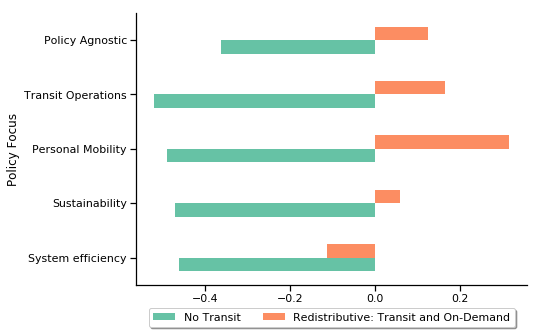

In [513]:
full_df = pd.concat(dfs,axis=1,keys=wt_df.index)
sns.set_context('notebook')
sns.set_palette('Set2')
fig, ax = plt.subplots()
fig.set_size_inches(7,5)
sns.despine()
final_scores = full_df.sum(axis=0).unstack().plot(kind='barh',ax=ax,legend=True)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.175),
          ncol=3, fancybox=True, shadow=True)

plt.savefig('img/policy_inputs/final_scores.png',format='png',dpi=150,bbox_inches="tight")

In [603]:
"""Transitland Schedule API: create GeoJSON map of transit frequency."""
import json
import urllib

import datetime
import math
import os

##########################################################
##### Transitland Datastore Interface                #####
##########################################################


class Datastore(object):
    """A simple interface to the Transitland Datastore."""

    def __init__(self, host):
        self.host = host

    def _request(self, uri):
        print(uri)
        req = urllib.request.Request(uri)
        req.add_header('Content-Type', 'application/json')
        response = urllib.request.urlopen(req)
        return json.loads(response.read())

    def request(self, endpoint, **data):
        """Request with JSON response."""
        return self._request(
            '%s%s?%s' % (self.host, endpoint, urllib.parse.urlencode(data or {}))
        )

    def paginated(self, endpoint, key, **data):
        """Request with paginated JSON response. Returns generator."""
        response = self.request(endpoint, **data)
        while response:
            meta = response['meta']
            print ('%s: %s -> %s of %s' % (
                key,
                meta['offset'],
                meta['offset']+meta['per_page'],
                "100"
            ))
            for entity in response[key]:
                yield entity
            if meta.get('next'):
                response = self._request(meta.get('next'))
            else:
                response = None

    def schedule_stop_pairs(self, **data):
        """Request Schedule Stop Pairs."""
        return self.paginated(
            '/api/v1/schedule_stop_pairs',
            'schedule_stop_pairs',
            **data
        )

    def stops(self, **data):
        """Request Stops"""
        return self.paginated(
            '/api/v1/stops',
            'stops',
            **data
        )

    def stop(self, onestop_id):
        """Request a Stop by Onestop ID."""
        return self.request('/api/v1/stops/%s' % onestop_id)


def duration(t1, t2):
    """Return the time between two HH:MM:SS times, in seconds."""
    fmt = '%H:%M:%S'
    t1 = datetime.datetime.strptime(t1, fmt)
    t2 = datetime.datetime.strptime(t2, fmt)
    return (t2 - t1).seconds

##########################################################
##### Count trips between stops, output GeoJSON      #####
##########################################################


HOST = 'http://transit.land'
PER_PAGE = 1000
BBOX = [
    -96.8,
    43.61,
-96.6,
43.48
]
DATE = '2018-04-12'
BETWEEN = [
    '03:00:00',
    '23:00:00'
]
HOURS = duration(BETWEEN[0], BETWEEN[1]) / 3600.0
# Minimum vehicles per hour
# http://colorbrewer2.org/
COLORMAP = {
    0: '#fef0d9',
    3: '#fdcc8a',
    6: '#fc8d59',
    10: '#d7301f'
}
OUTFILE = 'output.geojson'
# if os.path.exists(OUTFILE):
#     raise Exception("File exists: %s" % OUTFILE)

# Transitland Datastore API
ds = Datastore(HOST)

# Group SSPs by (origin, destination) and count
edges = {}
ssps = ds.schedule_stop_pairs(
    bbox=','.join(map(str, BBOX)),
    origin_departure_between=','.join(BETWEEN),
    date=DATE,
    per_page=PER_PAGE
)
for ssp in ssps:
    key = ssp['origin_onestop_id'], ssp['destination_onestop_id']
    if key not in edges:
        edges[key] = 0
    edges[key] += 1

# Get Stop geometries
stops = {}
for stop in ds.stops(per_page=PER_PAGE, bbox=','.join(map(str, BBOX))):
    stops[stop['onestop_id']] = stop

# Create GeoJSON Features
colorkeys = sorted(COLORMAP.keys())
features = []
edges_sorted = sorted(edges.items(), key=lambda x: x[1])
for (origin_onestop_id, destination_onestop_id), trips in edges_sorted:
    # Origin and destination geometries
    origin = stops.get(origin_onestop_id)
    destination = stops.get(destination_onestop_id)
    if not (origin and destination):
        # Outside bounding box
        continue
    # Frequency is in trips per hour
    frequency = trips / HOURS
    frequency_class = [i for i in colorkeys if frequency >= i][-1]
    print ("Origin: %s Destination: %s Trips: %s Frequency: %s Freq. class: %s" % (
        origin_onestop_id,
        destination_onestop_id,
        trips,
        frequency,
        frequency_class
    ))
    # Create the GeoJSON Feature
    features.append({
        "type": "Feature",
        "name": "%s -> %s" % (origin['name'], destination['name']),
        "properties": {
            "origin_onestop_id": origin_onestop_id,
            "destination_onestop_id": destination_onestop_id,
            "trips": trips,
            "frequency": frequency,
            "frequency_class": frequency_class,
            "stroke": COLORMAP[frequency_class],
            "stroke-width": frequency_class+1,
            "stroke-opacity": 1.0
        },
        "geometry": {
            "type": "LineString",
            "coordinates": [
                origin['geometry']['coordinates'],
                destination['geometry']['coordinates']
            ]
        }
    })

# Create the GeoJSON Feature Collection
fc = {
    "type": "FeatureCollection",
    "features": features
}

with open(OUTFILE, 'w', encoding='utf8') as outfile:
    json.dump(fc, outfile, sort_keys = True, indent = 4, ensure_ascii = False)


http://transit.land/api/v1/schedule_stop_pairs?bbox=-96.8%2C43.61%2C-96.6%2C43.48&origin_departure_between=03%3A00%3A00%2C23%3A00%3A00&date=2018-04-12&per_page=1000
schedule_stop_pairs: 0 -> 1000 of 100
https://api.transit.land/api/v1/schedule_stop_pairs?bbox=-96.8%2C43.61%2C-96.6%2C43.48&date=2018-04-12&offset=1000&origin_departure_between=03%3A00%3A00%2C23%3A00%3A00&per_page=1000&sort_key=id&sort_order=asc
schedule_stop_pairs: 1000 -> 2000 of 100
https://api.transit.land/api/v1/schedule_stop_pairs?bbox=-96.8%2C43.61%2C-96.6%2C43.48&date=2018-04-12&offset=2000&origin_departure_between=03%3A00%3A00%2C23%3A00%3A00&per_page=1000&sort_key=id&sort_order=asc
schedule_stop_pairs: 2000 -> 3000 of 100
https://api.transit.land/api/v1/schedule_stop_pairs?bbox=-96.8%2C43.61%2C-96.6%2C43.48&date=2018-04-12&offset=3000&origin_departure_between=03%3A00%3A00%2C23%3A00%3A00&per_page=1000&sort_key=id&sort_order=asc
schedule_stop_pairs: 3000 -> 4000 of 100
https://api.transit.land/api/v1/schedule_stop_p